# **1. Conexion Drive**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/Youtube/'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Lectura de datos**

In [ ]:
df = pd.read_csv(path+'car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# **3. Data Wrangling**

In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# **4. EDA**

## Summary

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [ ]:
df['Car_Name'].nunique()

98

In [ ]:
df.drop('Car_Name',axis=1,inplace=True)

In [ ]:
df.insert(0, "Age", df["Year"].max()+1-df["Year"] )
df.drop('Year', axis=1, inplace=True)

In [ ]:
df.head(3)

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0


## Outliers

An outlier is a data point that differs significantly from other observations. They can cause the performance of the model to drop. We use boxplot to detect outliers:

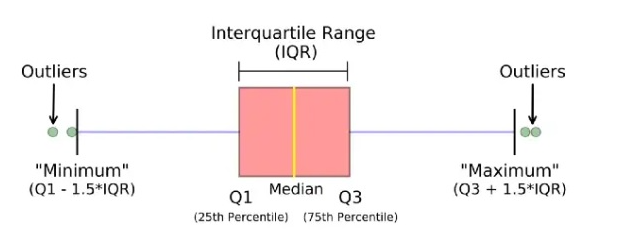

In [ ]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

In [ ]:
OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values,
                              df.select_dtypes(include='object').columns.values])
OrderedCols

array(['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type', 'Seller_Type', 'Transmission'], dtype=object)

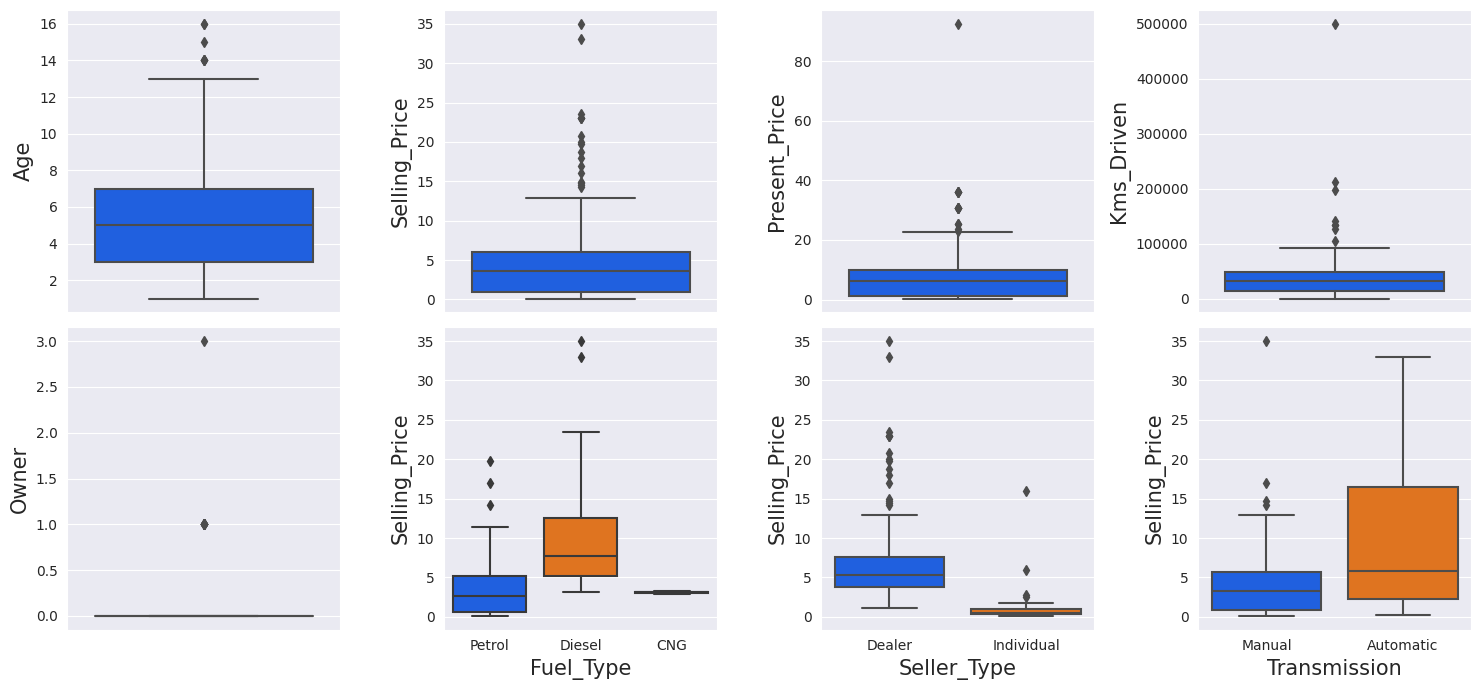

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(15,7),dpi=100)

for i,col in enumerate(OrderedCols):
  x= i//4
  y = i%4

  if i<5:
    sns.boxplot(data=df,y=col,ax=ax[x,y])
    ax[x,y].yaxis.label.set_size(15)
  else:
    sns.boxplot(data=df,x=col,y='Selling_Price',ax=ax[x,y])
    ax[x,y].xaxis.label.set_size(15)
    ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()
plt.show()

In [ ]:
outliers_indexes = []
target = 'Selling_Price'

for col in df.select_dtypes(include='object').columns:
    for cat in df[col].unique():
        df1 = df[df[col] == cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = df1[(df1[target] < minimum) | (df1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())


for col in df.select_dtypes(exclude='object').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = df[(df[col] < minimum) | (df[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())


outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

38 outliers were identified, whose indices are:

[27, 37, 39, 50, 51, 52, 53, 54, 179, 184, 58, 59, 189, 62, 63, 64, 191, 66, 192, 196, 69, 193, 198, 201, 77, 205, 79, 80, 82, 84, 85, 86, 92, 93, 96, 97, 106, 241]


It is not acceptable to drop an observation just because it is an outlier. They can be legitimate observations and it’s important to investigate the nature of the outlier before deciding whether to drop it or not. We are allowed to delete outliers in two cases:

+ Outlier is due to incorrectly entered or measured data
+ Outlier creates a significant association

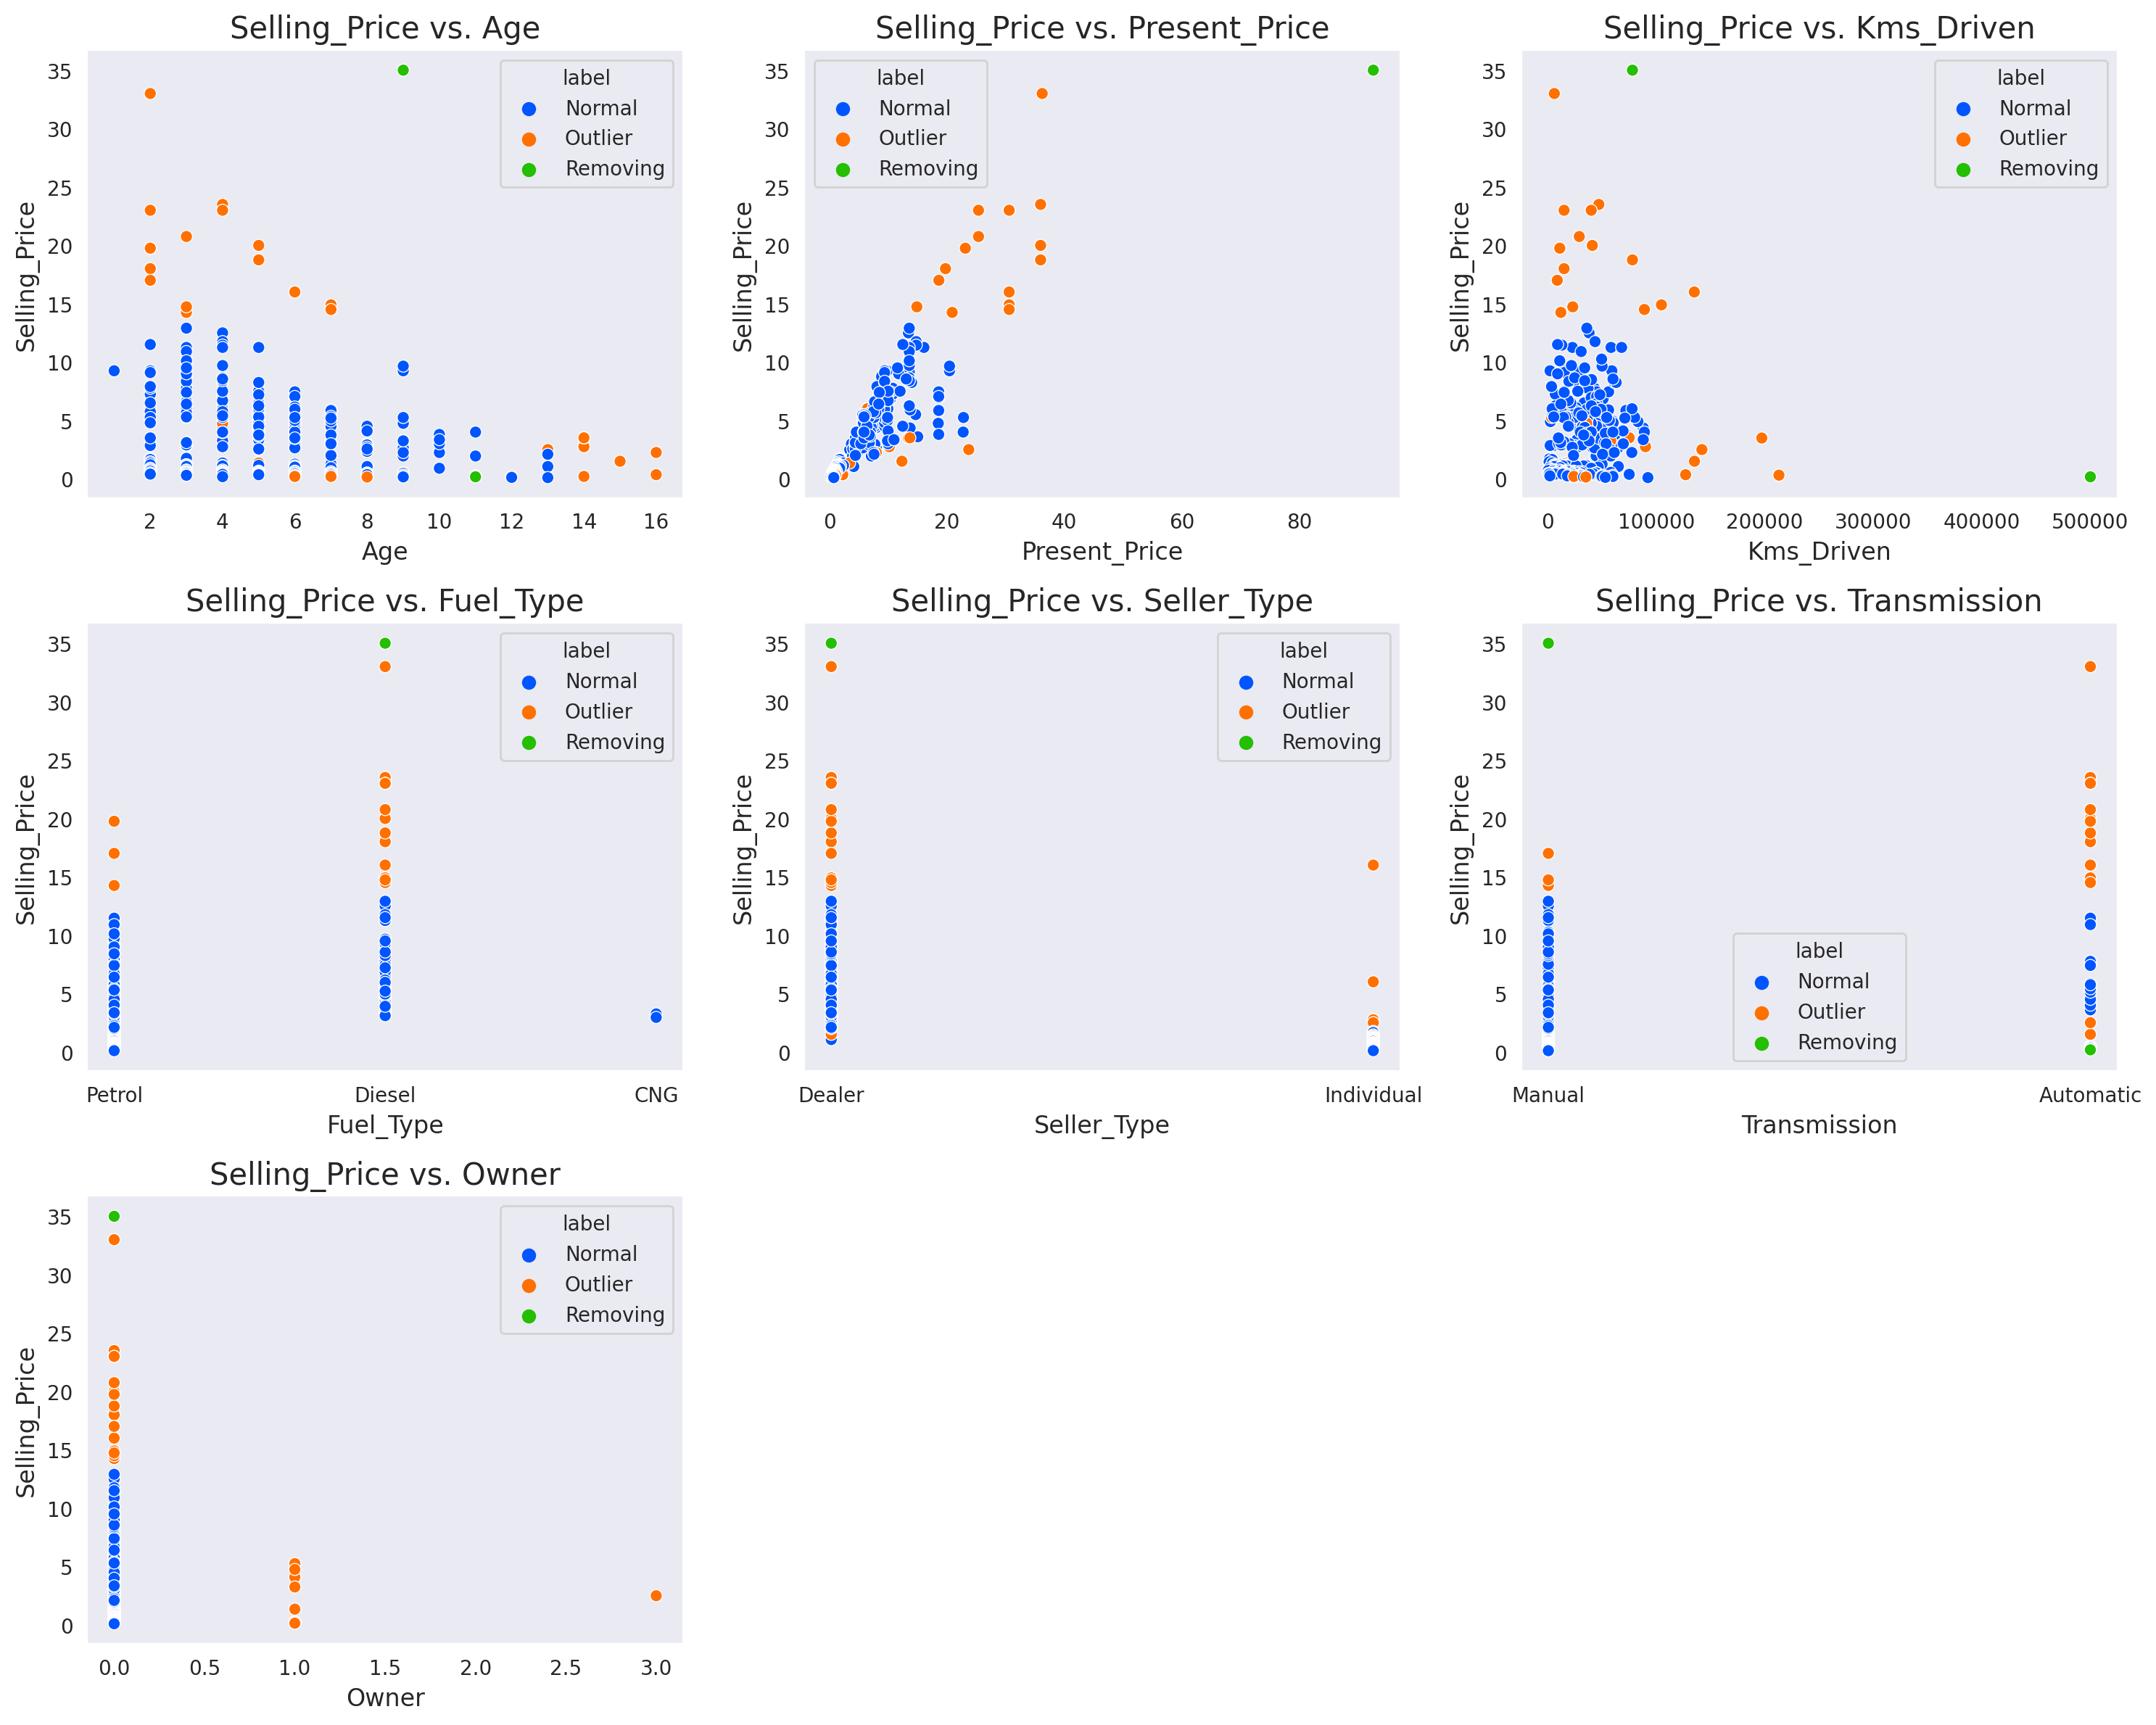

In [ ]:
# Outliers Labeling
df1 = df.copy()
df1['label'] = 'Normal'
df1.loc[outliers_indexes,'label'] = 'Outlier'

# Removing Outliers
removing_indexes = []
removing_indexes.extend(df1[df1[target]>33].index)
removing_indexes.extend(df1[df1['Kms_Driven']>400000].index)
df1.loc[removing_indexes,'label'] = 'Removing'

# Plot
target = 'Selling_Price'
features = df.columns.drop(target)
colors = ['#0055ff','#ff7000','#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=3 ,ncols=3, figsize=(15,12), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=df1, x=features[i], y=target, hue='label', ax=ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()

ax[2, 1].axis('off')
ax[2, 2].axis('off')
plt.tight_layout()
plt.show()

The outliers to be removed will be related to the following indexes:

In [ ]:
removing_indexes = list(set(removing_indexes))
removing_indexes

[196, 86]

## Missing values

In [ ]:
df.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Duplicates

In [ ]:
df[df.duplicated(keep=False)]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,3,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,3,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [ ]:
df1 = df.copy()
df1.drop(removing_indexes, inplace=True)
df1.reset_index(drop=True, inplace=True)

# **4. EDA**

## Univariate Analysis

In [ ]:
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

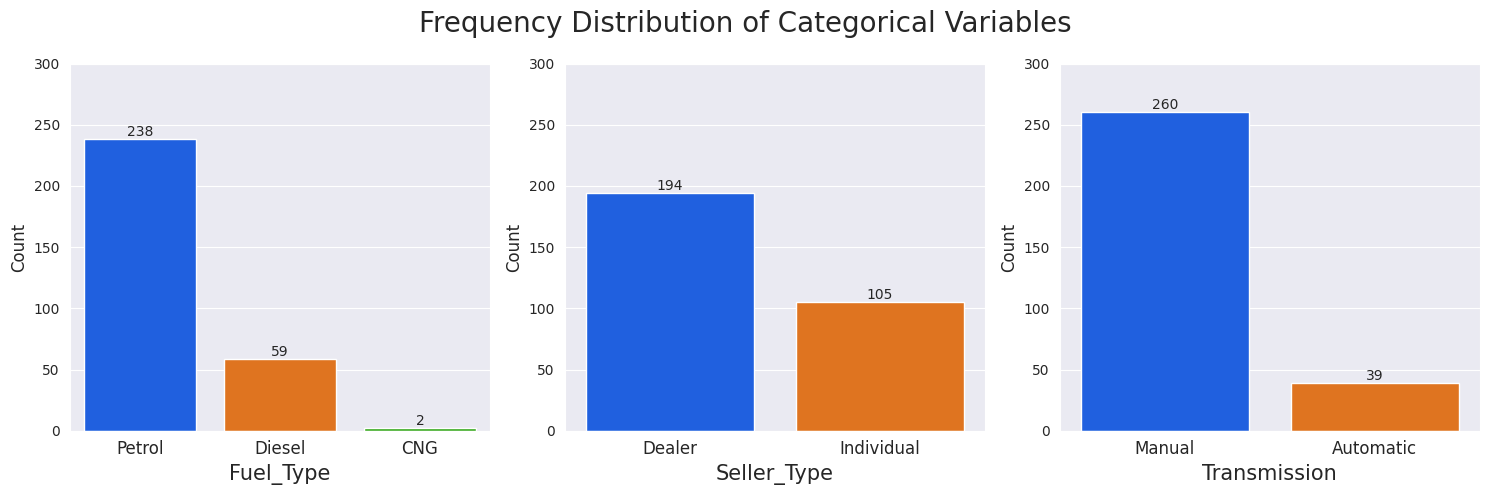

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=100)
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

for i in range(len(CatCols)):
    graph = sns.countplot(x=CatCols[i], data=df1, ax=ax[i])
    ax[i].set_xlabel(CatCols[i], fontsize=15)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_ylim([0,300])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=12)
    for cont in graph.containers:
        graph.bar_label(cont)

plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=20)
plt.tight_layout()
plt.show()

Conclusion:
- There are 3 Fuel_Type categories. Petrol has the highest frequency and CNG has the least frequency.
- There are 2 Seller_Type categories. Dealer has the highest frequency and Individual has the least frequency.
- There are 2 Transmission categories. Manual has the highest frequency and Automatic has the least frequency.

In [ ]:
NumCols = ['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

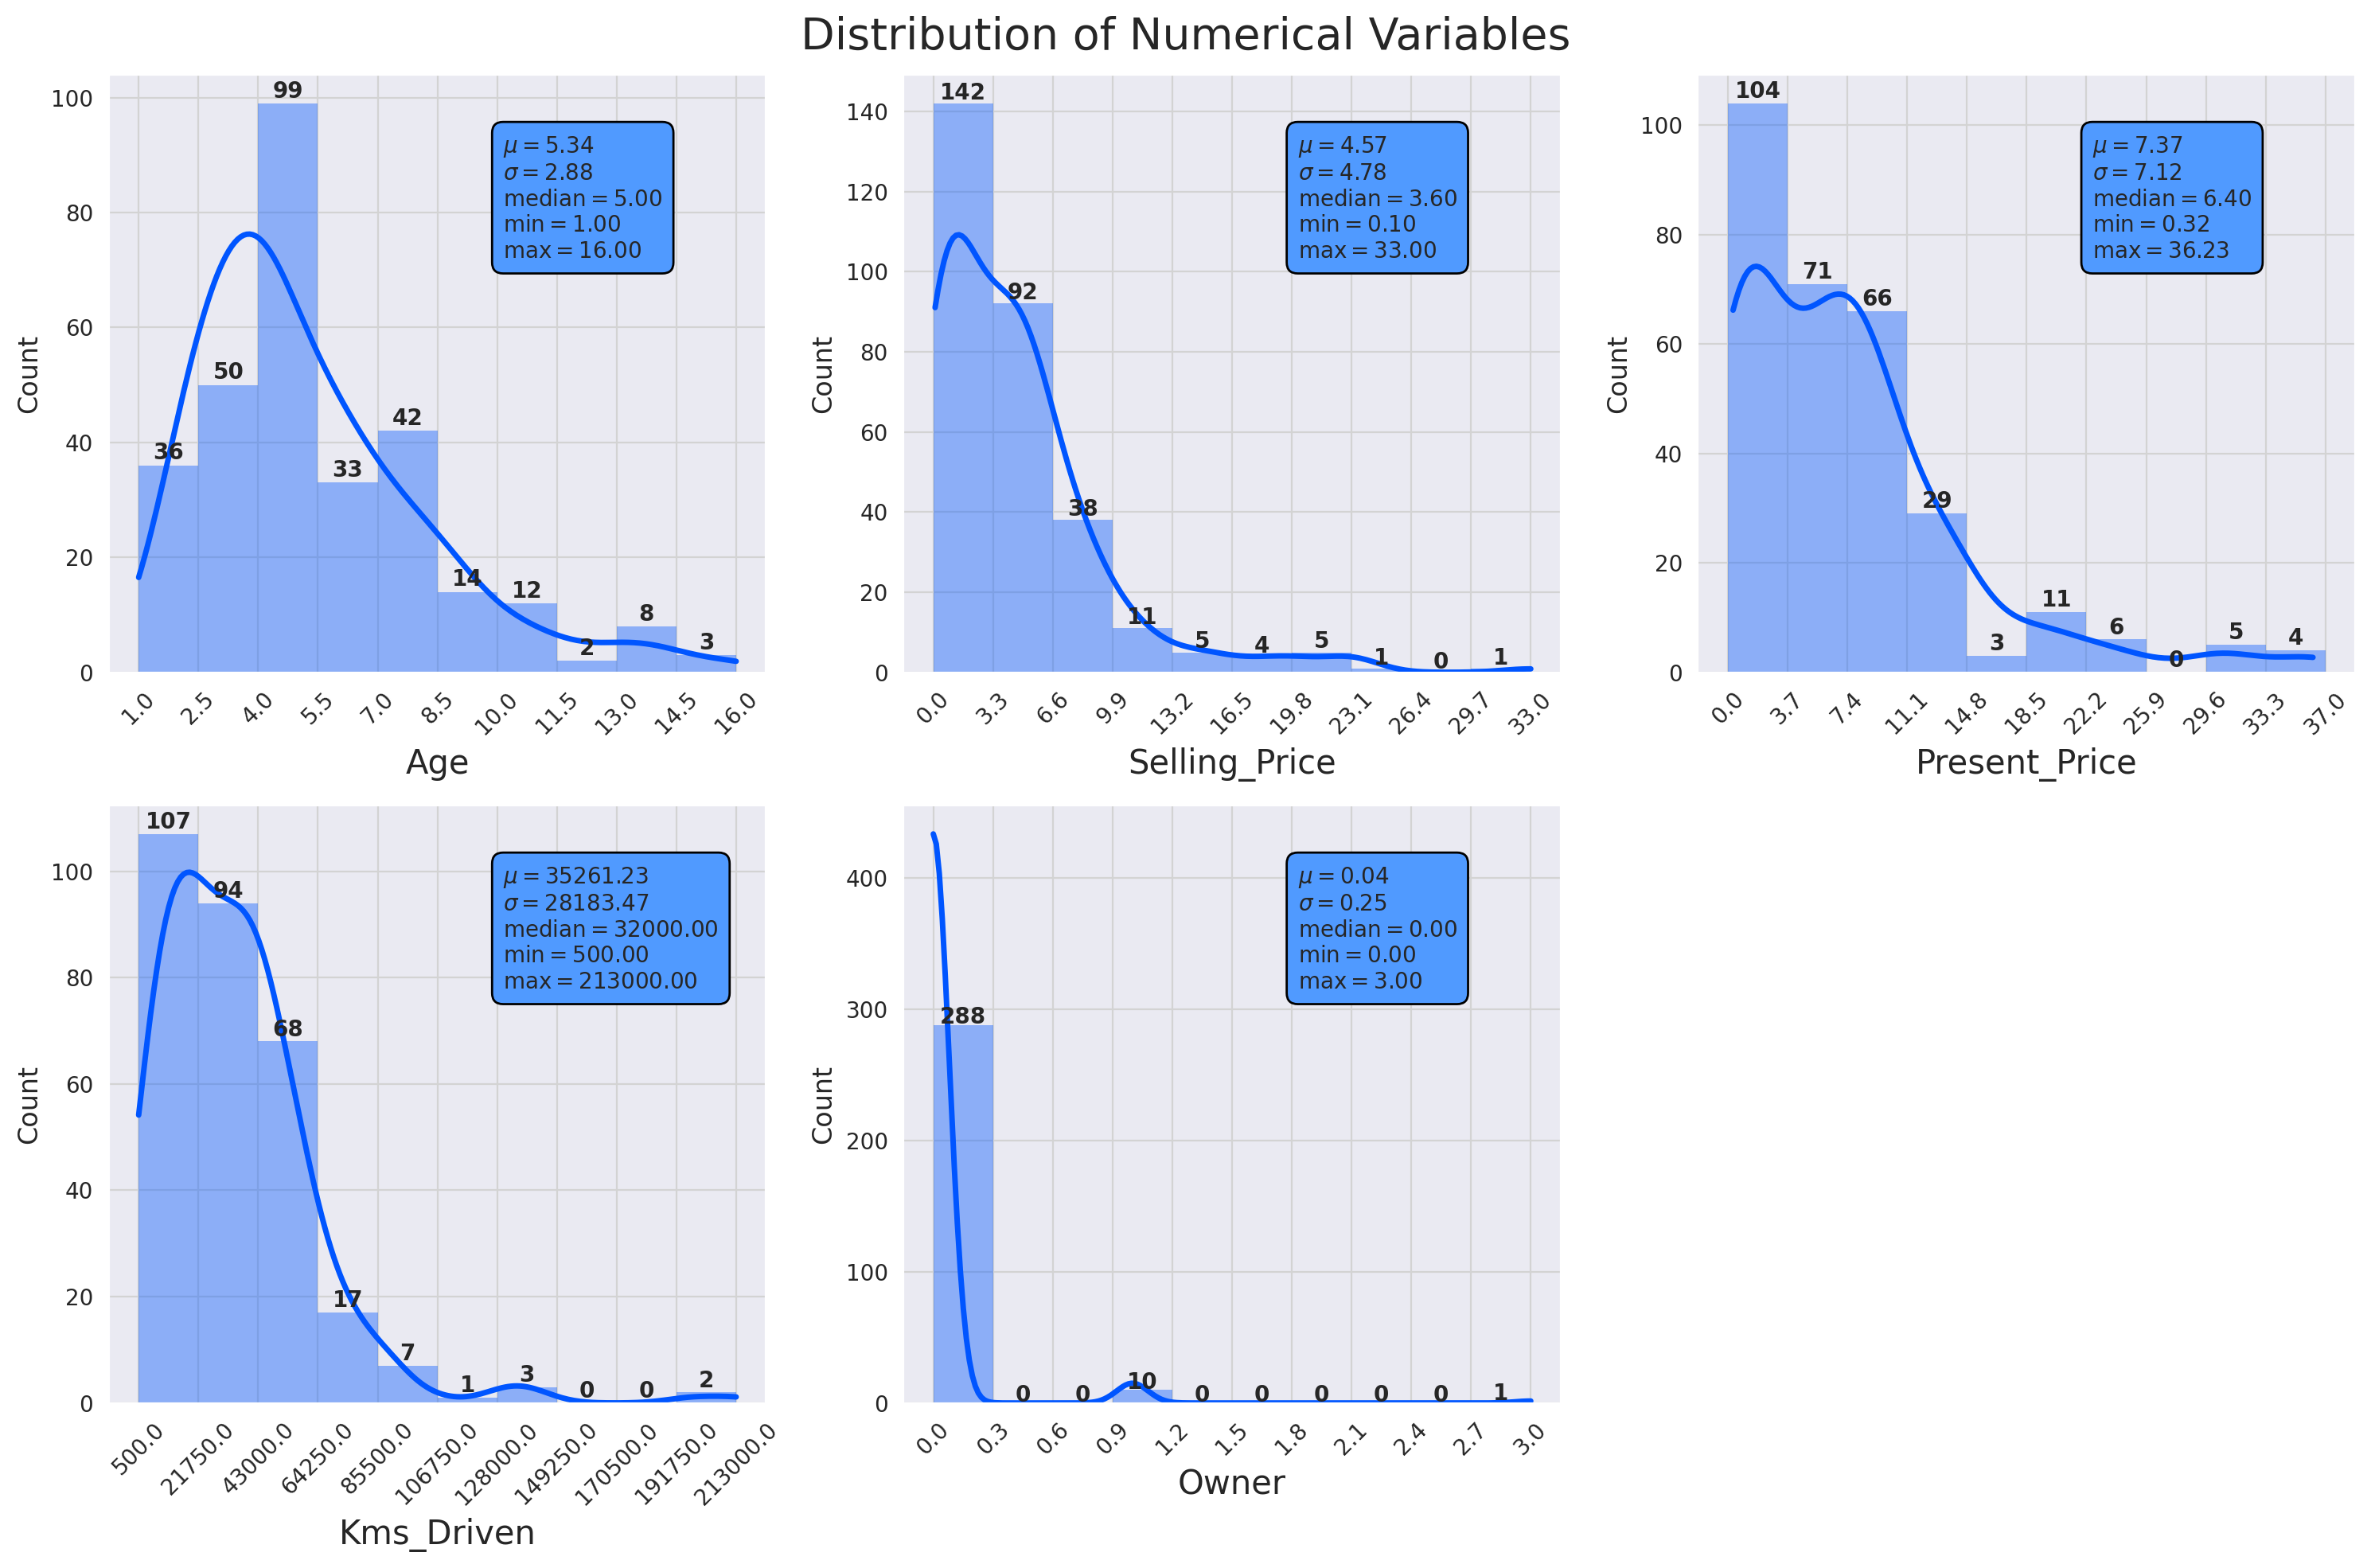

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10), dpi=200)
c = '#0055ff'

for i in range(len(NumCols)):
    row = i//3
    col = i%3
    values, bin_edges = np.histogram(df1[NumCols[i]],
                                     range=(np.floor(df1[NumCols[i]].min()), np.ceil(df1[NumCols[i]].max())))
    graph = sns.histplot(data=df1, x=NumCols[i], bins=bin_edges, kde=True, ax=ax[row,col],
                         edgecolor='none', color=c, alpha=0.4, line_kws={'lw': 2.5})
    ax[row,col].set_xlabel(NumCols[i], fontsize=15)
    ax[row,col].set_ylabel('Count', fontsize=12)
    ax[row,col].set_xticks(np.round(bin_edges,1))
    ax[row,col].set_xticklabels(ax[row,col].get_xticks(), rotation = 45)
    ax[row,col].grid(color='lightgrey')
    for j,p in enumerate(graph.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")

    textstr = '\n'.join((
    r'$\mu=%.2f$' %df1[NumCols[i]].mean(),
    r'$\sigma=%.2f$' %df1[NumCols[i]].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df1[NumCols[i]]),
    r'$\mathrm{min}=%.2f$' %df1[NumCols[i]].min(),
    r'$\mathrm{max}=%.2f$' %df1[NumCols[i]].max()
    ))
    ax[row,col].text(0.6, 0.9, textstr, transform=ax[row,col].transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))

ax[1, 2].axis('off')
plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.tight_layout()
plt.show()

Variables are all right skewed!

## Bivariate Analysis

In [ ]:
# Plot Selling_Price vs. numerical features:

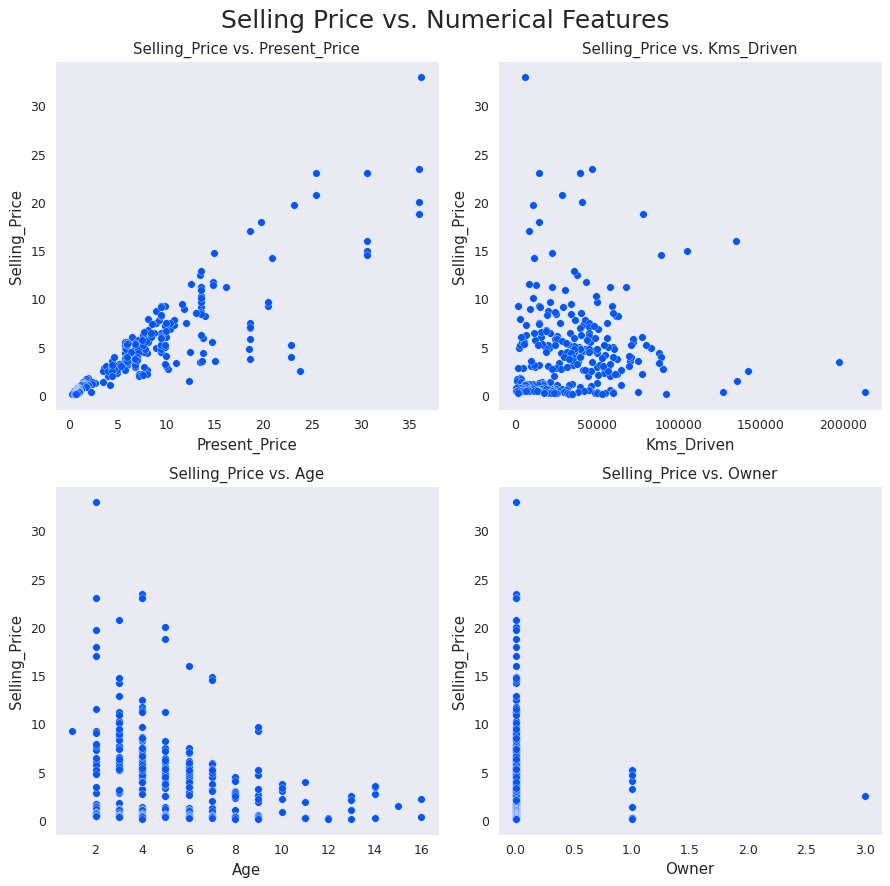

In [ ]:
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(10,10), dpi=90)
num_features = ['Present_Price', 'Kms_Driven', 'Age', 'Owner']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(num_features)):
    row = i//2
    col = i%2
    ax[row,col].scatter(df1[num_features[i]], df1[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('Selling Price vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

Conclusion:
+ As Present_Price increases, Selling_Price increases as well. So Selling_Price is directly proportional to Present_Price.

+ As the car's Kms_Driven increases, its Selling_Price decreases. So Selling_Price is inversely proportional to Kms_Driven.

+ As the car ages, its Selling_Price decreases. So Selling_Price is inversely proportional to the Age of the car.

+ As the number of previous car owners increases, its Selling_Price decreases. So Selling_Price is inversely proportional to Owner.

In [ ]:
# Selling_Price vs. categorical features strip plots:

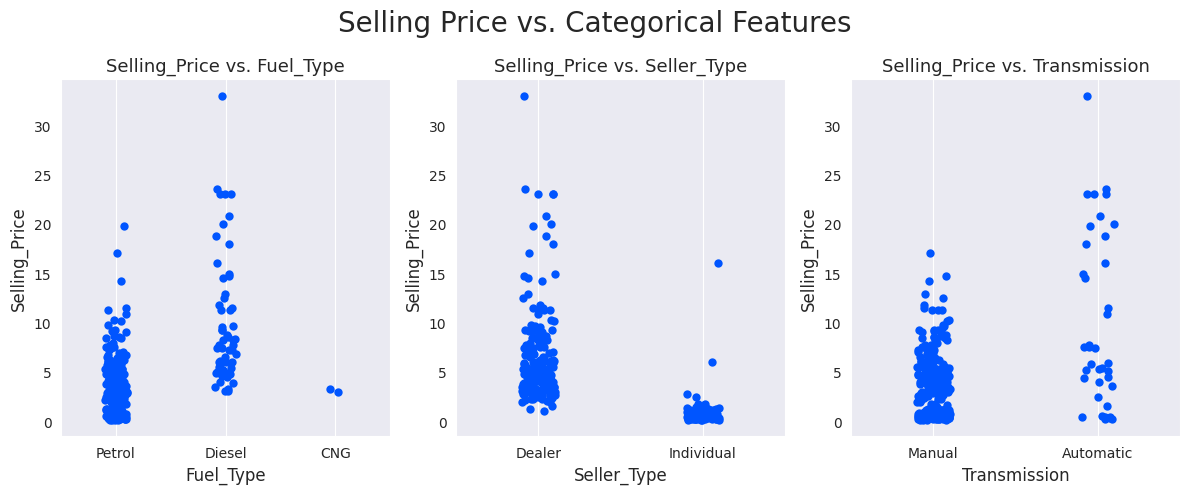

In [ ]:
fig, axes = plt.subplots(nrows=1 ,ncols=3, figsize=(12,5), dpi=100)
cat_features = ['Fuel_Type', 'Seller_Type', 'Transmission']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(cat_features)):
    sns.stripplot(ax=axes[i], x=cat_features[i], y=target, data=df1, size=6, color=c)
    axes[i].set_title('{} vs. {}'.format(target, cat_features[i]), size = 13)
    axes[i].set_xlabel(cat_features[i], size = 12)
    axes[i].set_ylabel(target, size = 12)
    axes[i].grid()

plt.suptitle('Selling Price vs. Categorical Features', size = 20)
plt.tight_layout()
plt.show()

Conclusion:
+ Diesel Cars > CNG Cars > Petrol Cars in terms of Selling_Price.
+ The Selling_Price of cars sold by individuals is lower than the price of cars sold by dealers.
+ Automatic cars are more expensive than manual cars.

## Multivariate Analysis

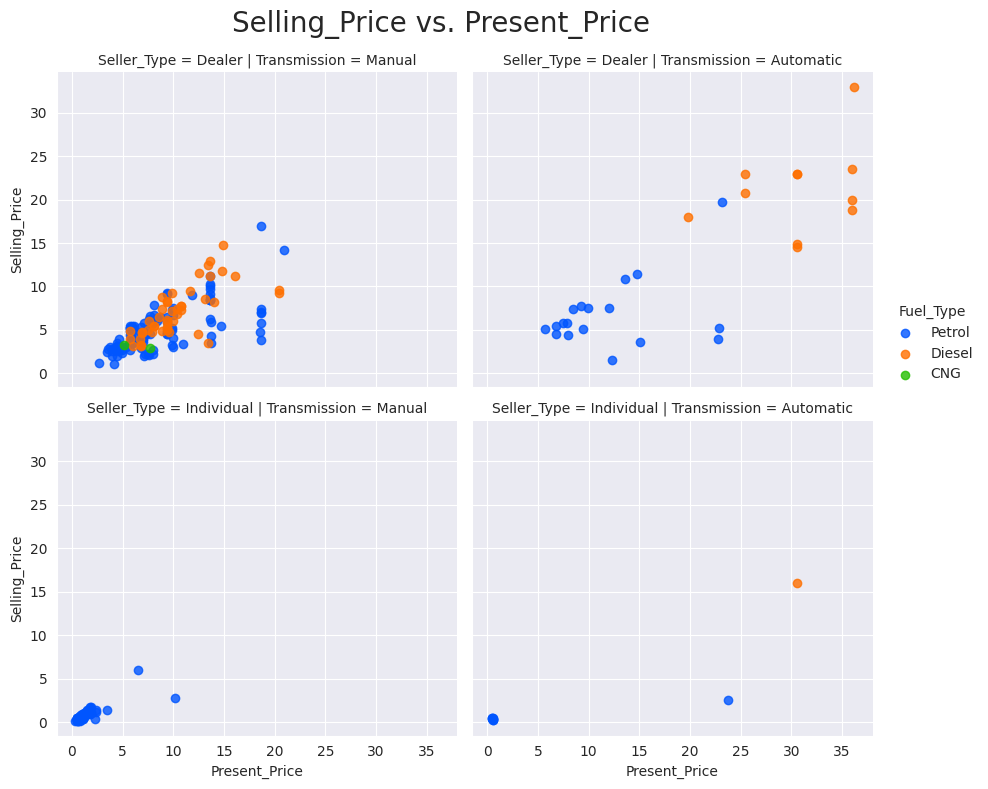

In [ ]:
graph = sns.lmplot(x='Present_Price', y='Selling_Price', data= df1, fit_reg=False, row='Seller_Type',
                   col='Transmission', hue='Fuel_Type', palette=CustomPalette, height=4, aspect=1)

plt.suptitle('Selling_Price vs. Present_Price', fontsize=20)
sns.move_legend(graph, "lower center", bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.tight_layout()
plt.show()

Conclusion:
+ All of the Individual Seller_Type have had Petrol cars.
+ Diesel cars all have belonged to the Dealer Seller_Type.
+ All of the CNG cars have had Manual Transmission and have belonged to Dealer Seller_Type.

## Encoding

In [ ]:
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

df1 = pd.get_dummies(df1, columns=CatCols, drop_first=True)
df1.head(5)

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,0,1,0,1
1,6,4.75,9.54,43000,0,1,0,0,1
2,2,7.25,9.85,6900,0,0,1,0,1
3,8,2.85,4.15,5200,0,0,1,0,1
4,5,4.60,6.87,42450,0,1,0,0,1


## Correlation Analysis

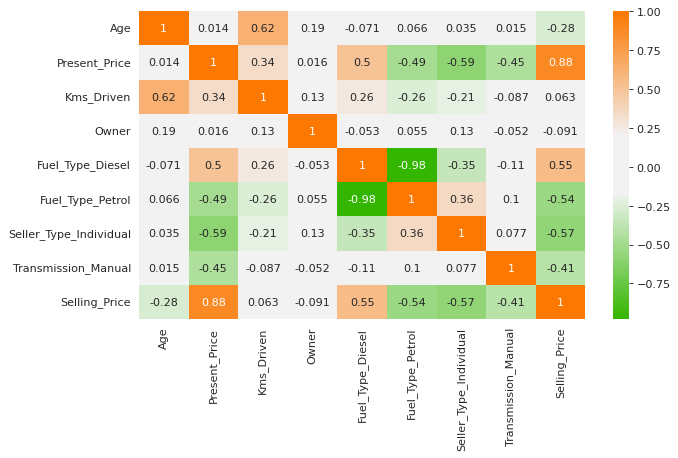

In [ ]:
target = 'Selling_Price'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(9, 5), dpi=80)
ax = sns.heatmap(pd.concat([df1.drop(target,axis=1), df1[target]],axis=1).corr(), annot=True, cmap=cmap)
plt.show()

Conclutions

+ The target variable "Selling Price" is highly correlated with Present_Price & Seller_Type & Fuel_Type.
+ Some independent variables like Fuel_Type_Petrol and Fuel_Type_Disel are highly correlated, which is called Multicollinearity.

# **6. Modelado**

## Train-Test Split

In [ ]:
X = df1.drop('Selling_Price',axis=1)
y = df1['Selling_Price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (209, 8)
X_test shape:  (90, 8)
y_train shape:  (209,)
y_test shape:  (90,)


In [ ]:
y_test_actual = y_test

## Scale data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
pd.DataFrame(data=np.append(lr.intercept_,lr.coef_),
             index=['Intercept']+[col+'Coef.' for col in X.columns],columns=['Value']).sort_values('Value',ascending=False)

,Value
Intercept,4.302488
Present_PriceCoef.,3.492729
Fuel_Type_DieselCoef.,0.850217
Fuel_Type_PetrolCoef.,0.207319
Transmission_ManualCoef.,0.027375
OwnerCoef.,-0.232722
Seller_Type_IndividualCoef.,-0.377334
Kms_DrivenCoef.,-0.589672
AgeCoef.,-0.936339


### Evaluation

In [ ]:
from sklearn import metrics

In [ ]:
def model_evaluation(model,X_test,y_test,model_name):
  y_pred = model.predict(X_test)

  MAE = metrics.mean_absolute_error(y_test,y_pred)
  MSE = metrics.mean_squared_error(y_test,y_pred)
  RMSE = np.sqrt(MSE)
  R2_Score = metrics.r2_score(y_test,y_pred)

  return pd.DataFrame([MAE,MSE,RMSE,R2_Score],index=['MAE','MSE','RMSE','R2-Score'],columns=[model_name])

In [ ]:
model_evaluation(lr,X_test_scaled,y_test,'Linear Reg.')

,Linear Reg.
MAE,1.198867
MSE,3.714913
RMSE,1.927411
R2-Score,0.887245


## Cross-Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

By using cross-validation, we can have more confidence in our estimation for the model evaluation metrics than the former simple train-test split:

In [ ]:
lr_cv = LinearRegression()
scaler = StandardScaler()
pipeline = make_pipeline(StandardScaler(),LinearRegression())

kf = KFold(n_splits=6,shuffle=True,random_state=0)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result = cross_validate(pipeline,X,y,cv=kf,return_train_score=True,scoring=scoring)

MAE_mean = (-result['test_neg_mean_absolute_error']).mean()
MAE_std = (-result['test_neg_mean_absolute_error']).std()
MSE_mean = (-result['test_neg_mean_squared_error']).mean()
MSE_std = (-result['test_neg_mean_squared_error']).std()
RMSE_mean = (-result['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result['test_r2'].mean()
R2_Score_std = result['test_r2'].std()

pd.DataFrame({'Mean':[MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean],'Std':[MAE_std,MSE_std,RMSE_std,R2_Score_std]},index=['MAE','MSE','RMSE','R2-Score'])

,Mean,Std
MAE,1.154774,0.147377
MSE,3.131755,1.314319
RMSE,1.728702,0.378609
R2-Score,0.855703,0.033720


The linear regression model obtained R2-score of %85.57 using 6-fold cross-validation.

Pipeline is a great way to prevent data leakage as it ensures that the appropriate method is performed on the correct data subset. This is ideal for using in cross-validation since it ensures that only the training folds are used when performing fit and the test set (validation set) is used only for calculating the accuracy score in each iteration of cross-validation.

# Assumption

We need to check the assumptions of linear regression, because if the assumptions are not met, the interpretation of the results will not always be valid:

#### **Assumption 1 - Linearity**

This assumes that there is a linear relationship between the independent variables or features and the dependent variable or label. Fitting a linear model to data with non-linear patterns results in serious prediction errors, because our model is underfitting.

To detect nonlinearity, we can check:

+ Plots of actual vs. predicted values -> The desired outcome is that points are symmetrically distributed around a diagonal line
+ Plots of residuals vs. predicted values -> The desired outcome is that points are symmetrically distributed around a horizontal line

In both cases we should have an almost constant variance.

In [ ]:
# Get residuals
def residuals(model, X_test, y_test):
    '''
    Creates predictions on the features with the model and calculates residuals
    '''
    y_pred = model.predict(X_test)
    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    return df_results

In [ ]:
# Plot Predicted vs Real vs Residuals
def linear_assumption(model, X_test, y_test):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model
    '''
    df_results = residuals(model, X_test, y_test)

    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)
    sns.regplot(x='Predicted', y='Actual', data=df_results, lowess=True, ax=ax[0],
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[0].set_title('Actual vs. Predicted Values', fontsize=15)
    ax[0].set_xlabel('Predicted', fontsize=12)
    ax[0].set_ylabel('Actual', fontsize=12)

    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True, ax=ax[1],
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=15)
    ax[1].set_xlabel('Predicted', fontsize=12)
    ax[1].set_ylabel('Residuals', fontsize=12)

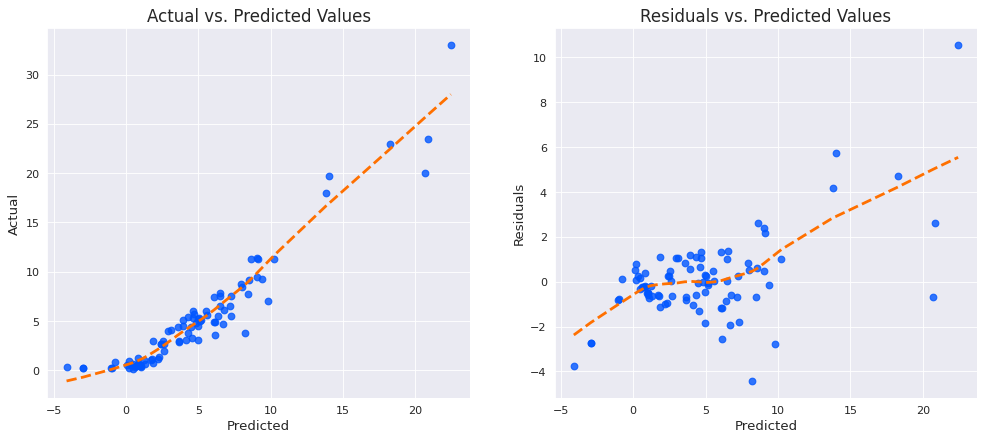

In [ ]:
linear_assumption(lr, X_test_scaled, y_test)

The inspection of the plots shows that the linearity assumption is not satisfied.

Potential solutions:

- Applying nonlinear transformations
- Adding polynomial terms to some of the predictors

#### **Assumption 2 - Normality of Residuals**

This assumes that the error terms of the model are normally distributed with a mean value of zero.

This can actually happen if either the predictors or the label are significantly non-normal. Other potential reasons could include the linearity assumption being violated or presence of a few large outliers in data affecting our model.

A violation of this assumption could cause issues with either shrinking or inflating our confidence intervals. When the residuals distribution significantly departs from Gaussian, confidence intervals may be too wide or too narrow. Technically, we can omit this assumption if we assume instead that the model equation is correct and our goal is to estimate the coefficients and generate predictions (in the sense of minimizing mean squared error). However, normally we are interested in making valid inferences from the model or estimating the probability that a given prediction error will exceed some threshold in a particular direction. To do so, the assumption about the normality of residuals must be satisfied.

To investigate this assumption we can check:

- Check residuals histogram
- Quantile-Quantile probability plot -> plotting the residuals vs the order of statistic
- Anderson-Darling test

In [ ]:
from statsmodels.stats.diagnostic import normal_ad
from scipy import stats

In [ ]:
def normal_errors_assumption(model, X_test, y_test, p_value_thresh=0.05):
    '''
    Function for inspecting the assumption of normality of residuals.
    '''
    df_results = residuals(model, X_test, y_test)

    # Anderson-Darling Test
    p_value = normal_ad(df_results['Residuals'])[1]

    print('\nP-value from the test (below 0.05 generally means non-normal):  ', np.round(p_value,6))
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed. Assumption not satisfied.')
    else:
        print('Residuals are normally distributed. Assumption satisfied.')


    # Residuals Histogram
    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)

    sns.histplot(data=df_results, x='Residuals', kde=True, ax=ax[0], bins=15,
                 color='#0055ff', edgecolor='none', alpha=0.4, line_kws={'lw': 2.5})
    ax[0].set_xlabel('Residuals', fontsize=12)
    ax[0].set_ylabel('Count', fontsize=12)
    ax[0].set_title('Distribution of Residuals', fontsize=15)
    textstr = '\n'.join((
        r'$\mu=%.2f$' %np.mean(df_results['Residuals']),
        r'$\sigma=%.2f$' %np.std(df_results['Residuals']),
        ))
    ax[0].text(0.7, 0.9, textstr, transform=ax[0].transAxes, fontsize=15, verticalalignment='top',
                 bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))


    # Q-Q Probability Plot
    stats.probplot(df_results['Residuals'], dist="norm", plot= ax[1])
    ax[1].set_title("Residuals Q-Q Plot", fontsize=15)
    ax[1].set_xlabel('Theoretical Quantiles', fontsize=12)
    ax[1].set_ylabel('Ordered Values', fontsize=12)
    ax[1].get_lines()[0].set_markerfacecolor('#509aff')
    ax[1].get_lines()[1].set_color('#ff7000')
    ax[1].get_lines()[1].set_linewidth(2.5)
    ax[1].get_lines()[1].set_linestyle('--')
    ax[1].legend(['Actual','Theoretical'])

    plt.show()


P-value from the test (below 0.05 generally means non-normal):   0.0
Residuals are not normally distributed. Assumption not satisfied.


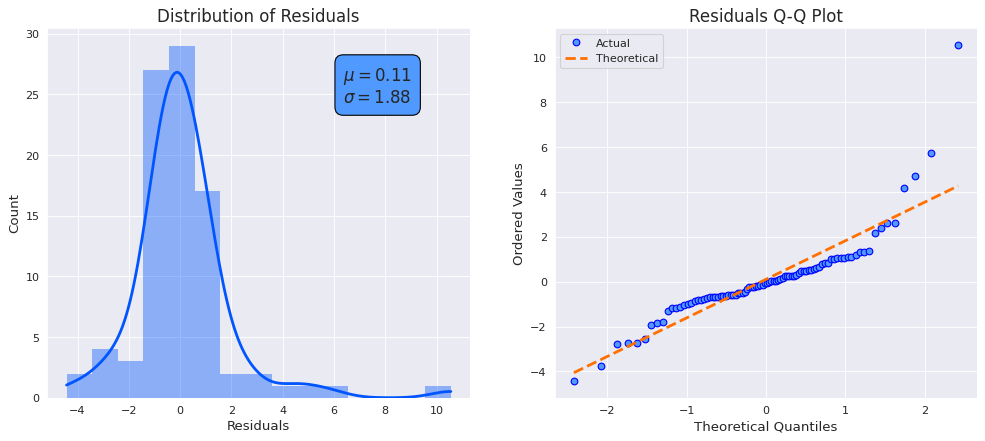

In [ ]:
normal_errors_assumption(lr, X_test_scaled, y_test)

In QQ Plot of residuals:

- The bow-shaped pattern of deviations from the diagonal implies that the residuals have excessive skewness.
- The s-shaped pattern of deviations from the diagonal implies excessive kurtosis of the residuals (there are either too many or too few large errors in both directions.)

The non-zero mean value and the positive skewness of the residual distribution and the s-shaped pattern of the deviations in the QQ plot show that the residuals do not follow the Gaussian distribution.

Potential solutions:

- Nonlinear transformation of target variable and features
- Removing potential outliers

#### **Assumption 3 - No Perfect Multicollinearity**

Multicollinearity occurs when the independent variables are correlated to each other. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison. The coefficient estimates can swing wildly based on which other independent variables are in the model and they become very sensitive to small changes in the model. Therefore, the estimates will be less precise and highly sensitive to particular sets of data. This increases the standard error of the coefficients, which results in them potentially showing as statistically insignificant when they might actually be significant. On the other hand, the simultaneous changes of the independent variables can lead to large fluctuations of the target variable, which leads to the overfitting of the model and the reduction of its performance.

To detect multicolinearity, we can:

- Use a heatmap of the correlation (step 7)
- Examine the variance inflation factor (VIF)

Interpretation of VIF: The square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. The higher the value of VIF the higher correlation between this variable and the rest. A rule of thumb is that if VIF > 10 then multicollinearity is high.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def multicollinearity_assumption(X):
    ''''
    This assumes that predictors are not correlated with each other and calculates VIF values of predictors
    '''
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    possible_multicollinearity = sum([1 for v in vif if v > 10])
    definite_multicollinearity = sum([1 for v in vif if v > 100])

    print('{} cases of possible multicollinearity.'.format(possible_multicollinearity))
    print('{} cases of definite multicollinearity.'.format(definite_multicollinearity))

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied.')
        else:
            print('Assumption possibly satisfied.')
    else:
        print('Assumption not satisfied.')

    return pd.DataFrame({'vif': vif}, index=X.columns).round(2)

In [ ]:
multicollinearity_assumption(X)

1 cases of possible multicollinearity.
0 cases of definite multicollinearity.
Assumption possibly satisfied.


,vif
Age,8.15
Present_Price,5.14
Kms_Driven,5.34
Owner,1.10
Fuel_Type_Diesel,6.11
Fuel_Type_Petrol,16.86
Seller_Type_Individual,2.61
Transmission_Manual,9.59


There is possible multicollinearity for ***Fuel_Type_Petrol***

Potential solutions:

- Using Regularization
- Removing features with high values of VIF
- Using PCA -> Reducing features to a smaller set of uncorrelated components

#### **Assumption 4 - No Autocorrelation of Residuals**
This assumes no autocorrelation of the residuals. The presence of autocorrelation usually indicates that we are missing some information that should be captured by the model. Our model can be systematically biased by under-prediction or over-prediction under certain conditions. This could be the result of violating the linearity assumption.

To investigate this assumption we can perform a Durbin-Watson test to determine whether the correlation is positive or negative:

- The test statistic always has a value between 0 and 4
- Values of 1.5 < d < 2.5 means that there is no autocorrelation in the data
- Values < 1.5 indicate positive autocorrelation, values > 2.5 indicate negative autocorrelation

In [ ]:
from statsmodels.stats.stattools import durbin_watson

In [ ]:
def autocorrelation_assumption(model, X_test, y_test):
    '''
    It assumes that there is no autocorrelation in the residuals. If there is autocorrelation, then
    there is a pattern that is not explained because the current value is dependent on the previous value.
    '''
    df_results = residuals(model, X_test, y_test)

    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', round(durbinWatson,3))

    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation. Assumption not satisfied.', '\n')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation. Assumption not satisfied.', '\n')
    else:
        print('Little to no autocorrelation. Assumption satisfied.', '\n')

In [ ]:
autocorrelation_assumption(lr, X_test_scaled, y_test)

Durbin-Watson: 1.823
Little to no autocorrelation. Assumption satisfied. 



Durbin-Watson test indicates there is no autocorrelation.

Potential solution for fixing autocorrelation of residuals:

- Adding interaction terms

#### **Assumption 5 - Homoscedasticity**

Homoscedasticity means that the residuals doesn’t change across all the values of the target variable.

When residuals do not have constant variance, it is difficult to determine the true standard deviation of the forecast errors, usually resulting in confidence intervals that are too wide/narrow. The effect of heteroscedasticity might also be putting too much weight to a subset of data when estimating coefficients.

To investigate if the residuals are homoscedastic, we can look at a plot of residuals vs. predicted values. The placement of the points should be random and no pattern (increase/decrease in values of residuals) should be visible.

In [ ]:
def homoscedasticity_assumption(model, X_test, y_test):
    """
    Homoscedasticity assumes that the residuals exhibit constant variance
    """
    print('The orange line should be flat:')
    df_results = residuals(model, X_test, y_test)

    fig = plt.figure(figsize=(6,6), dpi=80)
    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True,
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    plt.axhline(y=0, color='#23bf00', lw=1)
    plt.title('Residuals vs. Predicted Values', fontsize=15)
    plt.xlabel('Predicted Values', fontsize=12)
    plt.ylabel('Residuals', fontsize=12)
    plt.show()

The orange line should be flat:


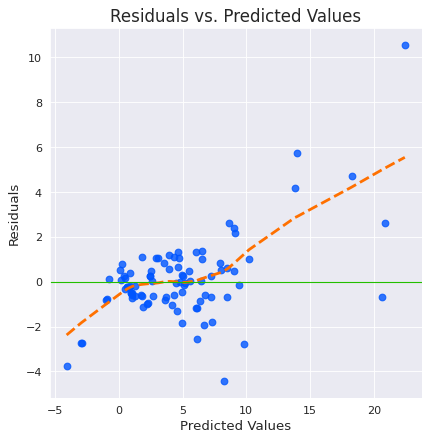

In [ ]:
homoscedasticity_assumption(lr, X_test_scaled, y_test)

We can not see a fully uniform variance across our residuals because the orange line is not flat. The assumption is not satisfied.

Potential solutions:

- Outlier removal
- Appllying log transformation of independent variables
- Applying polynomial regression

In the following:
- To satisfy the multicollinearity assumption, we remove the Fuel_Type_Petrol feature.
- Then, according to the pattern in the plot of the residuals vs. predicted values, we will use box-cox transformation on the entire dataset.
- By applying polynomial regression, we will try to improve the satisfaction of homoscedasticity and normality of residuals.
- Finally, we will use regularization to reduce the probability of the model to be overfit.

In [ ]:
del df1['Fuel_Type_Petrol']

In [ ]:
y_test_pred = lr.predict(X_test_scaled)
df_comp = pd.DataFrame({'Actual':y_test_actual, 'Predicted':y_test_pred})

In [ ]:
def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    df_comp.plot(y=['Actual','Predicted'], kind='bar', figsize=(20,7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Selling_Price', fontsize=15)
    plt.show()

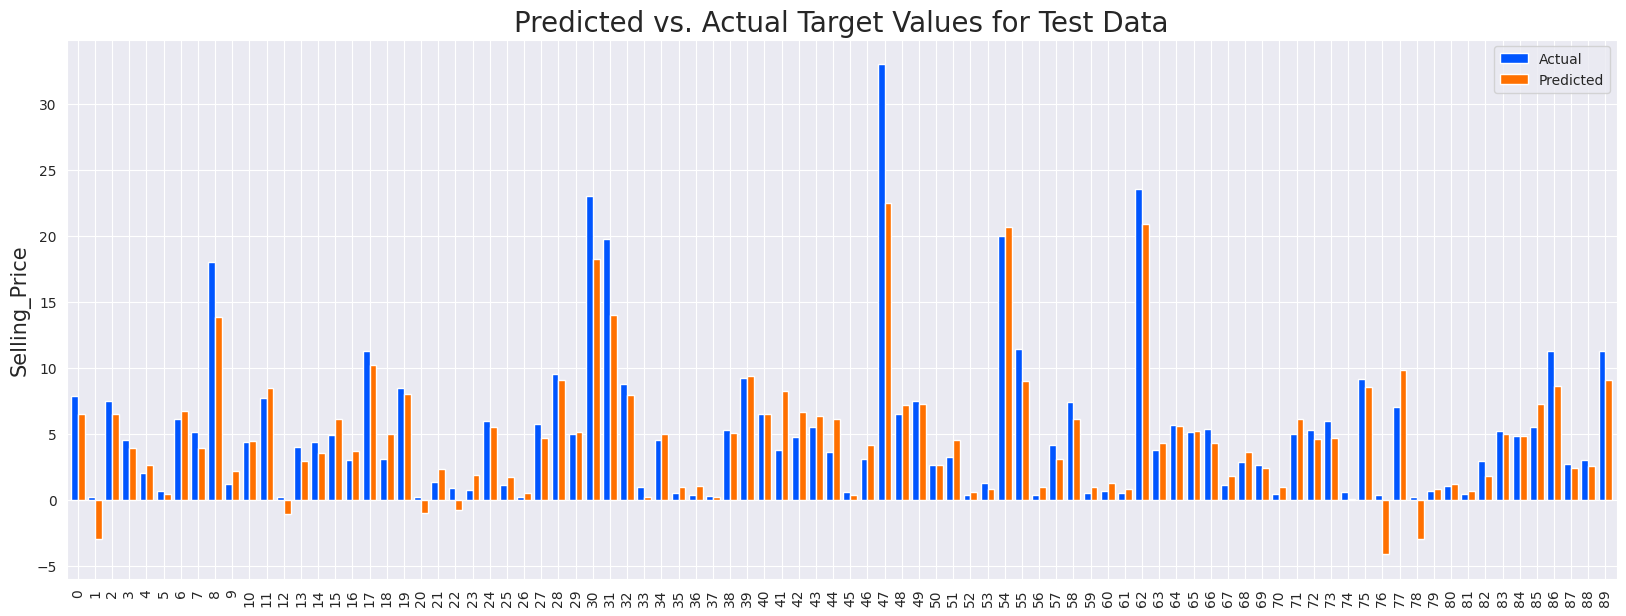

In [ ]:
compare_plot(df_comp)

The difference between the corresponding bars in the above bar plot shows the prediction error of the model on the test data. Also, out of 90 test samples, Selling_Price has been predicted negatively in 6 cases. A negative prediction for Selling_Price is disappointing.

# Apply Box-Cox Transformation

In order to satisfy the regression assumptions, we apply the Box-Cox transformation on the whole dataset. The Box-Cox transformations change the shape of our data, making it more close to a normal distribution.

In order to prevent data leakage, the fitted lambda value for each feature is obtained from the training data set and then the transformation is applied to the both training and test data:

In [ ]:
 # Transform Training Data & Save Lambda Values
fitted_lambda = pd.Series(np.zeros(len(df1.columns), dtype=np.float64), index=df1.columns)

y_train, fitted_lambda['Selling_Price'] = stats.boxcox(y_train+1)
for col in X_train.columns:
    X_train[col], fitted_lambda[col] = stats.boxcox(X_train[col]+1)

fitted_lambda

Age                       -0.360231
Selling_Price             -0.035121
Present_Price              0.078725
Kms_Driven                 0.350131
Owner                    -30.152327
Fuel_Type_Diesel          -7.291035
Seller_Type_Individual    -2.568079
Transmission_Manual       14.414394
Fuel_Type_Petrol           6.903209
dtype: float64

In [ ]:
# Transform Test Data Using Lambda Values
y_test = stats.boxcox(y_test+1, fitted_lambda['Selling_Price'])
for col in X_test.columns:
    X_test[col] = stats.boxcox(X_test[col]+1, fitted_lambda[col])

In [ ]:
y_train = pd.DataFrame(y_train, index=X_train.index, columns=['Selling_Price'])
y_test = pd.DataFrame(y_test, index=X_test.index, columns=['Selling_Price'])

X_boxcox = pd.concat([X_train, X_test])
y_boxcox = pd.concat([y_train, y_test])

df_boxcox = pd.concat([X_boxcox, y_boxcox], axis=1)
df_boxcox.sort_index(inplace=True)

del df_boxcox['Fuel_Type_Petrol']

the distribution of continuous variables all had a lot of positive skewness. In the following, we can see the change in the shape of the distribution of these variables after applying Box-Cox transformation:

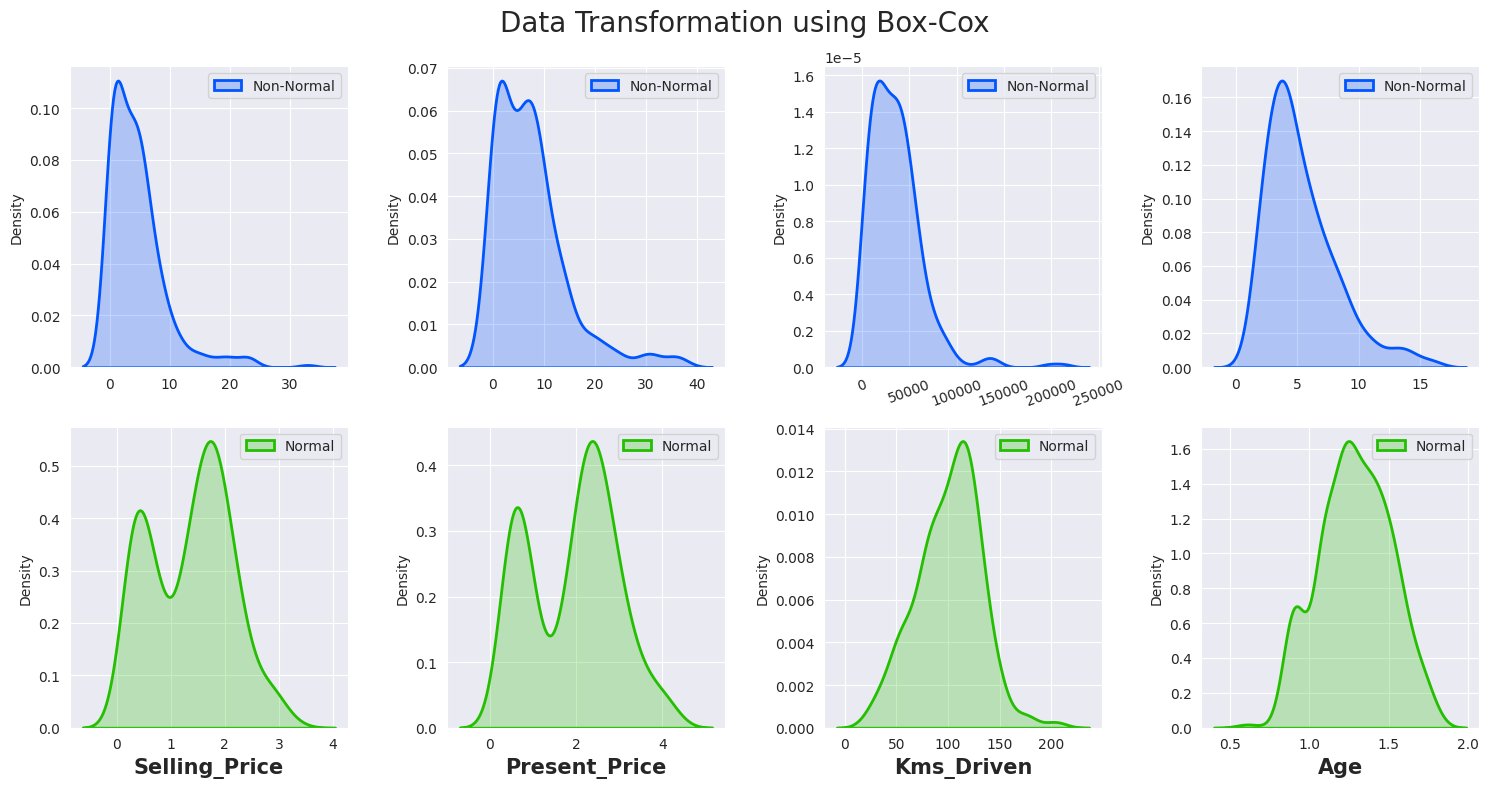

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(15,8), dpi=100)
columns = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']

for i,col in enumerate(columns):
    sns.kdeplot(df1[col], label="Non-Normal", fill=True, color='#0055ff', linewidth=2, ax=ax[0,i])
    sns.kdeplot(df_boxcox[col], label="Normal", fill=True, color='#23bf00', linewidth=2, ax=ax[1,i])
    ax[0,i].set_xlabel('', fontsize=15)
    ax[1,i].set_xlabel(col, fontsize=15, fontweight='bold')
    ax[0,i].legend(loc="upper right")
    ax[1,i].legend(loc="upper right")

ax[0,2].tick_params(axis='x', labelrotation = 20)
plt.suptitle('Data Transformation using Box-Cox', fontsize=20)
plt.tight_layout()
plt.show()

the distribution of the variables is closer to the normal distribution after applying Box-Cox.

In [ ]:
X = df_boxcox.drop('Selling_Price', axis=1)
y = df_boxcox['Selling_Price']

Now box-cox transformation is applied on X and y. Next, we will add higher order features to the model.

# 2nd-order Polynomial Regression

In order to overcome under-fitting and meet linear regression assumptions, first we try to increase the complexity of the model by adding all of the second-order terms of the features:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Create 2nd-order Polynomial Features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(X.columns))
X_poly.head(5)

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,Age Kms_Driven,...,Owner^2,Owner Fuel_Type_Diesel,Owner Seller_Type_Individual,Owner Transmission_Manual,Fuel_Type_Diesel^2,Fuel_Type_Diesel Seller_Type_Individual,Fuel_Type_Diesel Transmission_Manual,Seller_Type_Individual^2,Seller_Type_Individual Transmission_Manual,Transmission_Manual^2
0,1.320187,2.032688,98.846654,0.0,0.000000,0.0,1514.777352,1.742893,2.683528,130.496050,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,2.294550e+06
1,1.398824,2.587658,116.843776,0.0,0.136279,0.0,1514.777352,1.956709,3.619679,163.443905,...,0.0,0.0,0.0,0.0,0.018572,0.0,206.432287,0.0,0.0,2.294550e+06
2,0.907273,2.622591,60.223871,0.0,0.000000,0.0,1514.777352,0.823145,2.379406,54.639502,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,2.294550e+06
3,1.518024,1.749435,54.276845,0.0,0.000000,0.0,1514.777352,2.304398,2.655684,82.393575,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,2.294550e+06
4,1.320187,2.240043,116.305479,0.0,0.136279,0.0,1514.777352,1.742893,2.957275,153.544961,...,0.0,0.0,0.0,0.0,0.018572,0.0,206.432287,0.0,0.0,2.294550e+06


In [ ]:
poly_features_names = poly_features.get_feature_names_out(X.columns)
len(poly_features_names)

35

With the construction of second-order features, the number of dataframe features increased to 35

In [ ]:
# Split Dataset to Training & Test Sets
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

In [ ]:
print('X_poly_train shape: ', X_poly_train.shape)
print('X_poly_test shape: ', X_poly_test.shape)
print('y_poly_train shape: ', y_poly_train.shape)
print('y_poly_test shape: ',y_poly_test.shape)

X_poly_train shape:  (209, 35)
X_poly_test shape:  (90, 35)
y_poly_train shape:  (209,)
y_poly_test shape:  (90,)


In [ ]:
# Scale Data using Standard Scaler
scaler = StandardScaler()
scaler.fit(X_poly_train)

X_poly_train = scaler.transform(X_poly_train)
X_poly_train = pd.DataFrame(X_poly_train, columns=poly_features_names)

X_poly_test = scaler.transform(X_poly_test)
X_poly_test = pd.DataFrame(X_poly_test, columns=poly_features_names)

In [ ]:
# Create Polynomial Regression Model using Linear Regression
polynomial_reg = LinearRegression()
polynomial_reg.fit(X_poly_train, y_poly_train)

LinearRegression()

In [ ]:
# Model Evaluation
# 2nd-order Polynomial Model Performance on Test Data
model_evaluation(polynomial_reg, X_poly_test, y_poly_test, 'Polynomial Reg. Test')

,Polynomial Reg. Test
MAE,0.088163
MSE,0.011432
RMSE,0.106920
R2-Score,0.981584


In [ ]:
# 2nd-order Polynomial Model Performance on Training Data
model_evaluation(polynomial_reg, X_poly_train, y_poly_train, 'Polynomial Reg. Train')

,Polynomial Reg. Train
MAE,0.064327
MSE,0.006435
RMSE,0.080222
R2-Score,0.988170


As can be seen, using boxcox transformation and production of second-order features has improved the model performance greatly!

MAE: 1.199 ==> 0.088

MSE: 3.715 ==> 0.011

RMSE: 1.927 ==> 0.107

R2 Score: 88.72% ==> 98.16%

* The accuracy of the model on the training and test data are close to each other, so the model is not overfit.
* The production of third-order and higher features was also tested, which caused the model to become overfit.

## Cross-Validation
By using cross-validation, we can be more confident in our estimation of the model evaluation metrics:

In [ ]:
pipeline = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),  LinearRegression())

kf = KFold(n_splits=6, shuffle=True, random_state=0)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result2 = cross_validate(pipeline, X, y, cv=kf, return_train_score=True, scoring=scoring)

MAE_mean = (-result2['test_neg_mean_absolute_error']).mean()
MAE_std = (-result2['test_neg_mean_absolute_error']).std()
MSE_mean = (-result2['test_neg_mean_squared_error']).mean()
MSE_std = (-result2['test_neg_mean_squared_error']).std()
RMSE_mean = (-result2['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result2['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result2['test_r2'].mean()
R2_Score_std = result2['test_r2'].std()

pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std]},
             index=['MAE', 'MSE', 'RMSE' ,'R2-Score'])

,Mean,Std
MAE,0.079857,0.009664
MSE,0.011984,0.005636
RMSE,0.106877,0.023692
R2-Score,0.978172,0.010858


The accuracy obtained from the simple train test split is valid because it is close to the accuracy obtained from cross validation.

So far, we have a polynomial model consisting of 35 features with 98.16% r2-score. Lets check regression assumptions for this model.

## Assumptions

### Assumption 1 - Linearity

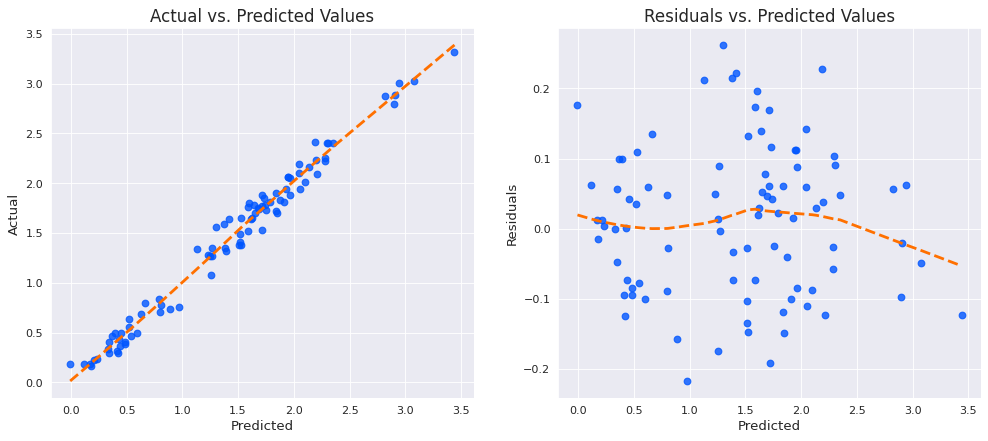

In [ ]:
linear_assumption(polynomial_reg, X_poly_test, y_poly_test)

### Assumption 2 - Normality of Residuals


P-value from the test (below 0.05 generally means non-normal):   0.450843
Residuals are normally distributed. Assumption satisfied.


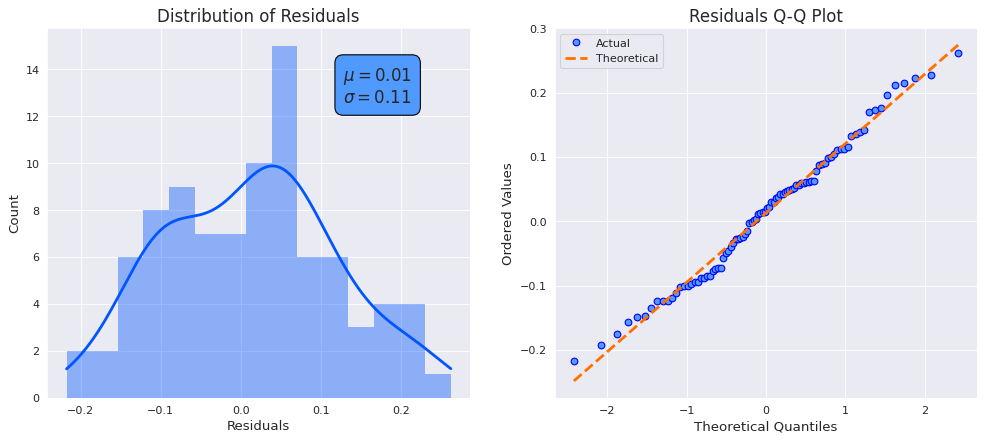

In [ ]:
normal_errors_assumption(polynomial_reg, X_poly_test, y_poly_test)

### Assumption 3 - No Perfect Multicollinearity

In [ ]:
import warnings

In [ ]:
warnings.simplefilter(action='ignore')
multicollinearity_assumption(X_poly).T

33 cases of possible multicollinearity.
28 cases of definite multicollinearity.
Assumption not satisfied.


,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,Age Kms_Driven,...,Owner^2,Owner Fuel_Type_Diesel,Owner Seller_Type_Individual,Owner Transmission_Manual,Fuel_Type_Diesel^2,Fuel_Type_Diesel Seller_Type_Individual,Fuel_Type_Diesel Transmission_Manual,Seller_Type_Individual^2,Seller_Type_Individual Transmission_Manual,Transmission_Manual^2
vif,5900.61,1600.38,2718.65,inf,inf,inf,inf,2291.33,1982.97,2095.33,...,inf,2.91,22.29,194.47,inf,5.69,40.17,inf,139.2,inf


### Assumption 4 - No Autocorrelation of Residuals

In [ ]:
autocorrelation_assumption(polynomial_reg, X_poly_test, y_poly_test)

Durbin-Watson: 1.836
Little to no autocorrelation. Assumption satisfied. 



### Assumption 5 - Homoscedasticity

The orange line should be flat:


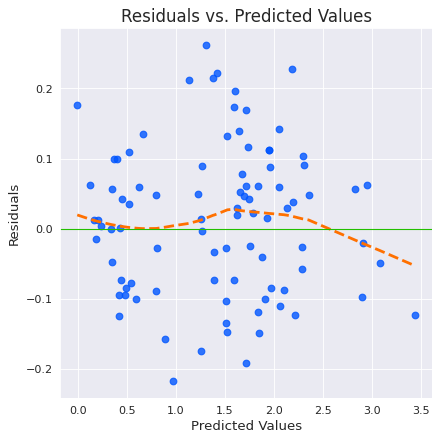

In [ ]:
homoscedasticity_assumption(polynomial_reg, X_poly_test, y_poly_test)

All regression assumptions are satisfied to a good extent except for multicollinearity. But in general, the polynomial model performs better than the linear model on this data set.

To reduce multicollinearity effects we can use Regularization. Regularized regression puts contraints on the magnitude of the coefficients and will progressively shrink them towards zero relative to the least-squares estimates. There are two types of regularization as follows:

* L1 Regularization or Lasso Regularization
* L2 Regularization or Ridge Regularization

# Ridge Regression

In L2 Regularization or Ridge Regularization, we add a penalty which is the sum of the squared values of weights on the loss function in order to push the estimated coefficients towards zero and not take more extreme values:

Loss function = OLS + alpha * (the sum of the square of coefficients)
In the above loss function, alpha is the tuning factor which has control over the strength of the penalty term. A small alpha value leads the model to overfit and a large alpha value leads the model to underfit. We use cross-validated ridge regression to tune alpha value:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV

In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge_cv_model = RidgeCV(alphas = alphas, cv = 3, scoring = 'neg_mean_squared_error')
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=3, scoring='neg_mean_squared_error')

The alpha value that results in the smallest cross-validation MSE

In [ ]:
ridge_cv_model.alpha_

0.06164233697210317

Ridge Model Performance on Test Data

In [ ]:
model_evaluation(ridge_cv_model, X_test, y_test, 'Ridge Reg. Test')

,Ridge Reg. Test
MAE,0.088627
MSE,0.011710
RMSE,0.108213
R2-Score,0.981136


Ridge Model Performance on Training Data

In [ ]:
model_evaluation(ridge_cv_model, X_train, y_train, 'Ridge Reg. Train')

,Ridge Reg. Train
MAE,0.065017
MSE,0.006550
RMSE,0.080929
R2-Score,0.987961


- The accuracy of the model on the training and test data are close to each other, so the model is not overfit.
- The Ridge model has almost the same accuracy as the polynomial model

The Ridge Regression coefficients are:

In [ ]:
ridge_cv_model.coef_

array([ 0.36609183,  0.94219762,  0.09864623,  0.02309365, -0.07519781,
       -0.11418703, -0.06460863, -0.35432223, -0.43584563, -0.1923328 ,
        0.16766332,  0.03133492, -0.05567052,  0.05302022, -0.02505909,
       -0.05810145, -0.06927462,  0.15954693,  0.07028801,  0.14433495,
        0.01641319, -0.03374477,  0.07765899,  0.04524194, -0.02998582,
        0.02309365, -0.01012408, -0.08092617, -0.07668233, -0.07519781,
       -0.00316941, -0.03175677, -0.11418703,  0.11123274, -0.06460863])

 L2 regularization allows weights to decay towards zero but not to zero.

## Assumptions

### Assumption 1 - Linearity

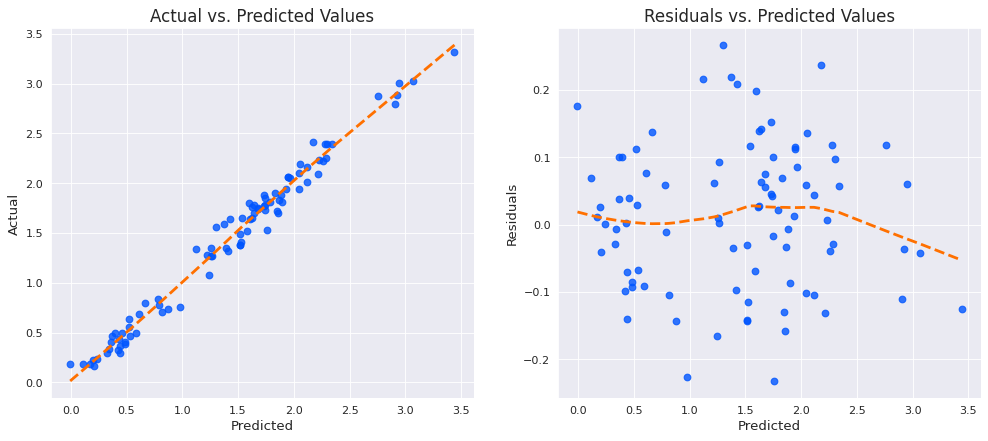

In [ ]:
linear_assumption(ridge_cv_model, X_test, y_test)

### Assumption 2 - Normality of Residuals



P-value from the test (below 0.05 generally means non-normal):   0.637709
Residuals are normally distributed. Assumption satisfied.


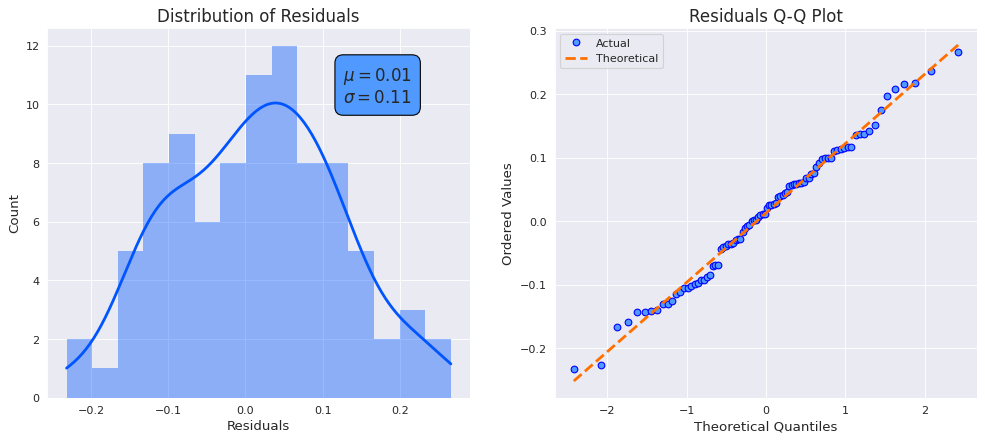

In [ ]:
normal_errors_assumption(ridge_cv_model, X_test, y_test)

### Assumption 3 - No Perfect Multicollinearity

In [ ]:
multicollinearity_assumption(X_poly).T

33 cases of possible multicollinearity.
28 cases of definite multicollinearity.
Assumption not satisfied.


,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,Age Kms_Driven,...,Owner^2,Owner Fuel_Type_Diesel,Owner Seller_Type_Individual,Owner Transmission_Manual,Fuel_Type_Diesel^2,Fuel_Type_Diesel Seller_Type_Individual,Fuel_Type_Diesel Transmission_Manual,Seller_Type_Individual^2,Seller_Type_Individual Transmission_Manual,Transmission_Manual^2
vif,5900.61,1600.38,2718.65,inf,inf,inf,inf,2291.33,1982.97,2095.33,...,inf,2.91,22.29,194.47,inf,5.69,40.17,inf,139.2,inf


### Assumption 4 - No Autocorrelation of Residuals

In [ ]:
autocorrelation_assumption(ridge_cv_model, X_test, y_test)

Durbin-Watson: 1.749
Little to no autocorrelation. Assumption satisfied. 



### Assumption 5 - Homoscedasticity

The orange line should be flat:


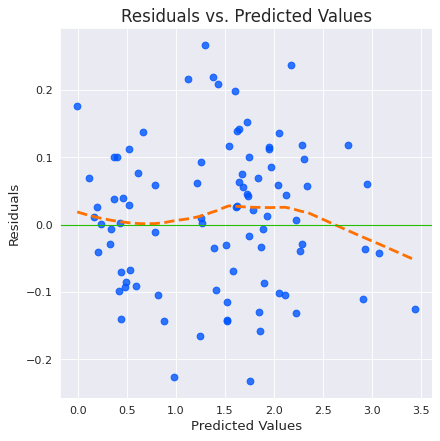

In [ ]:
homoscedasticity_assumption(ridge_cv_model, X_test, y_test)

The assumptions have improved slightly compared to the polynomial model

# Lasso Regression
In L1 Regularization or Lasso Regularization, we add a penalty which is the sum of the absolute values of weights on the loss function in order to push the estimated coefficients towards zero:

Loss function = OLS + alpha * (the sum of the absolute of coefficients)
We again use cross-validated lasso regression to tune alpha value:

In [ ]:
lasso_cv_model = LassoCV(eps=0.01, n_alphas=100, max_iter=10000, cv=3)

In [ ]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=3, eps=0.01, max_iter=10000)

The alpha value that results in the smallest cross-validation error

In [ ]:
lasso_cv_model.alpha_

0.006881979800721569

Lasso Model Performance on Test Data

In [ ]:
model_evaluation(lasso_cv_model, X_test, y_test, 'Lasso Reg. Test')

,Lasso Reg. Test
MAE,0.116568
MSE,0.021042
RMSE,0.145059
R2-Score,0.966102


Lasso Model Performance on Training Data

In [ ]:
model_evaluation(lasso_cv_model, X_train, y_train, 'Lasso Reg. Train')

,Lasso Reg. Train
MAE,0.097111
MSE,0.014366
RMSE,0.119859
R2-Score,0.973592


+ The accuracy of the model on the training and test data are close to each other, so the model is not overfit.
+ The accuracy of the Lasso model has decreased slightly compared to the ridge model.

The Lasso Regression coefficients

In [ ]:
lasso_coef = lasso_cv_model.coef_
lasso_coef

array([-0.        ,  0.60294926,  0.        , -0.        ,  0.        ,
       -0.10480454,  0.        , -0.11685201, -0.01226402, -0.10880579,
       -0.        ,  0.        ,  0.        ,  0.00765437,  0.        ,
       -0.        , -0.00784492,  0.07983492, -0.        ,  0.0062655 ,
       -0.        , -0.        ,  0.        ,  0.03806997,  0.01202733,
       -0.        , -0.        , -0.00863018,  0.00189986,  0.        ,
        0.01417074, -0.        , -0.03844947, -0.        ,  0.        ])

Non-zero coefficients in the Lasso model

In [ ]:
lasso_coef = pd.DataFrame(lasso_cv_model.coef_, index=X_poly.columns, columns=['Lasso Coef.'])
lasso_coef = lasso_coef[lasso_coef['Lasso Coef.']!=0]
lasso_coef.T

,Present_Price,Seller_Type_Individual,Age^2,Age Present_Price,Age Kms_Driven,Age Transmission_Manual,Present_Price Owner,Present_Price Fuel_Type_Diesel,Present_Price Transmission_Manual,Kms_Driven Seller_Type_Individual,Kms_Driven Transmission_Manual,Owner Seller_Type_Individual,Owner Transmission_Manual,Fuel_Type_Diesel Seller_Type_Individual,Seller_Type_Individual^2
Lasso Coef.,0.602949,-0.104805,-0.116852,-0.012264,-0.108806,0.007654,-0.007845,0.079835,0.006265,0.03807,0.012027,-0.00863,0.0019,0.014171,-0.038449


+ L1 regularization allows weights to decay to zero.
+ In exchange for reducing the number of features from 35 to 15, the R2-score of the model has decreased from %98.16 to %96.61.

## Assumptions

## Assumption 1 - Linearity

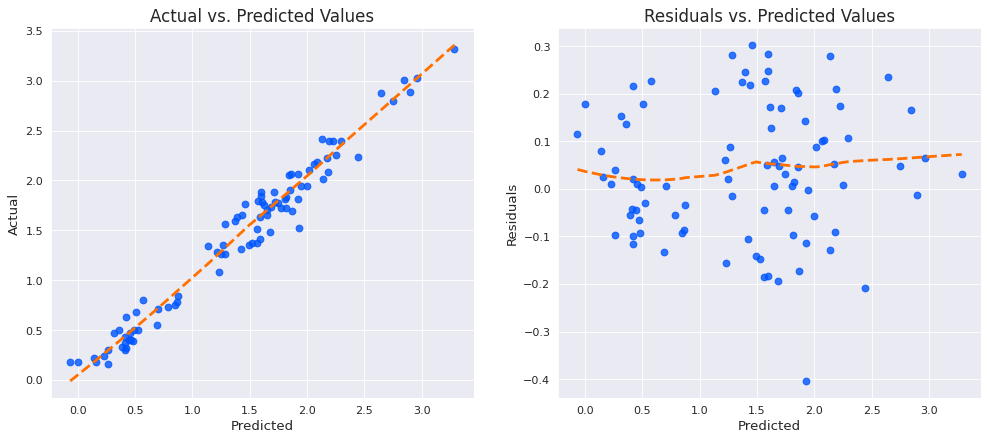

In [ ]:
linear_assumption(lasso_cv_model, X_test, y_test)

## Assumption 2 - Normality of Residuals


P-value from the test (below 0.05 generally means non-normal):   0.259964
Residuals are normally distributed. Assumption satisfied.


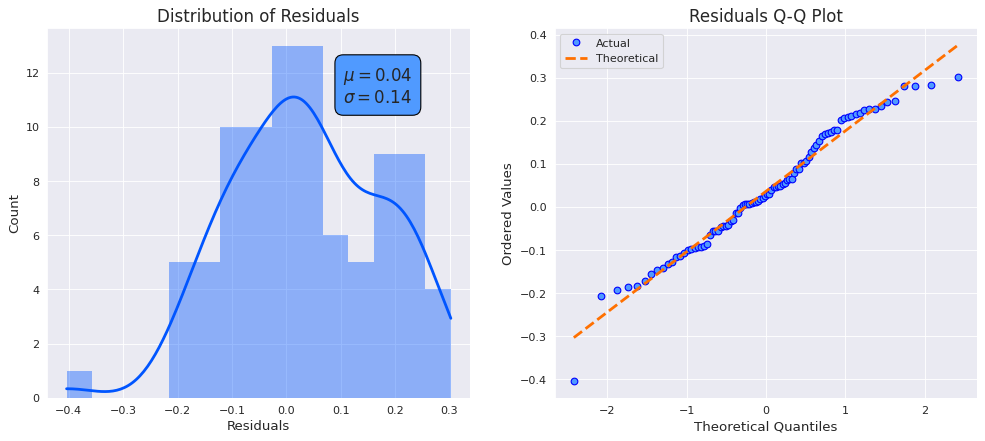

In [ ]:
normal_errors_assumption(lasso_cv_model, X_test, y_test)

## Assumption 3 - No Perfect Multicollinearity

In [ ]:
multicollinearity_assumption(X_poly[lasso_coef.index]).T

10 cases of possible multicollinearity.
7 cases of definite multicollinearity.
Assumption not satisfied.


,Present_Price,Seller_Type_Individual,Age^2,Age Present_Price,Age Kms_Driven,Age Transmission_Manual,Present_Price Owner,Present_Price Fuel_Type_Diesel,Present_Price Transmission_Manual,Kms_Driven Seller_Type_Individual,Kms_Driven Transmission_Manual,Owner Seller_Type_Individual,Owner Transmission_Manual,Fuel_Type_Diesel Seller_Type_Individual,Seller_Type_Individual^2
vif,64.45,inf,116.57,143.28,190.08,110.44,2.4,1.93,35.95,17.66,153.83,2.45,3.78,1.4,inf


## Assumption 4 - No Autocorrelation of Residuals

In [ ]:
autocorrelation_assumption(lasso_cv_model, X_test, y_test)

Durbin-Watson: 1.727
Little to no autocorrelation. Assumption satisfied. 



## Assumption 5 - Homoscedasticity

The orange line should be flat:


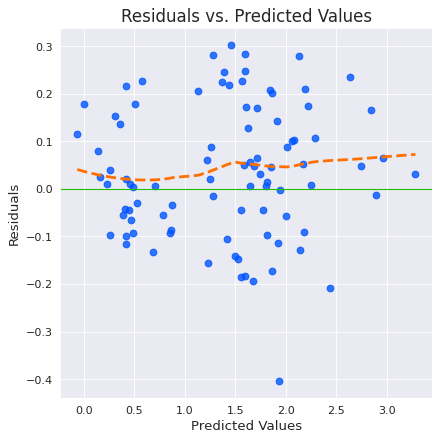

In [ ]:
homoscedasticity_assumption(lasso_cv_model, X_test, y_test)

The assumption of collinearity is more satisfied in the lasso than in the ridge, but the conditions in other assumptions are slightly worse than ridge.

# Elastic-Net Regression

Elastic-Net allows a balance of both L1 and L2 penalties, which can result in better performance than a model with either one or the other penalty on problems.

Loss function = OLS + [ alpha l1_ratio L1-norm ] + [ 0.5 alpha (1 - l1_ratio) * L2-norm ]
In addition to setting an alpha value, Elastic-Net also allows us to tune the l1-ratio parameter where l1-ratio = 0 corresponds to ridge and l1-ratio = 1 corresponds to lasso. We again use cross-validated Elastic-Net regression to tune hyperparameters:

In [ ]:
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, .998, 1],
                                eps=0.001, n_alphas=100, cv=3, max_iter=100000)

In [ ]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(cv=3, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 0.998, 1],
             max_iter=100000)

The l1-ratio value that results in the smallest cross-validation error is:

In [ ]:
elastic_cv_model.l1_ratio_

1.0

The alpha value that results in the smallest cross-validation error is:

In [ ]:
elastic_cv_model.alpha_

0.001045999737177493

Elastic-Net Model Performance on Test Data:

In [ ]:
model_evaluation(elastic_cv_model, X_test, y_test, 'Elastic-Net Reg. Test')

,Elastic-Net Reg. Test
MAE,0.103573
MSE,0.016286
RMSE,0.127617
R2-Score,0.973764


Elastic-Net Model Performance on Training Data:

In [ ]:
model_evaluation(elastic_cv_model, X_train, y_train, 'Elastic-Net Reg. Train')

,Elastic-Net Reg. Train
MAE,0.071250
MSE,0.007932
RMSE,0.089063
R2-Score,0.985419


- The accuracy of the model on the training and test data are close to each other, so the model is not overfited.
- The accuracy of the Elastic-Net model has decreased slightly compared to Ridge model.

The ElasticNet Regression coefficients are:

In [ ]:
elastic_coef = elastic_cv_model.coef_
elastic_coef

array([ 1.14423834e-01,  9.18371586e-01,  4.83910270e-02,  0.00000000e+00,
       -0.00000000e+00, -1.02217643e-03, -0.00000000e+00, -1.11747086e-01,
       -3.51474737e-01, -1.83650062e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -2.25557851e-02,  6.54871719e-02,  3.24090364e-02,  1.96962494e-02,
       -0.00000000e+00, -0.00000000e+00,  3.82600360e-02,  5.83414020e-02,
        1.56930129e-02,  0.00000000e+00, -7.63248732e-04, -3.16703405e-02,
        2.62643653e-02, -0.00000000e+00,  0.00000000e+00, -2.69529006e-02,
       -1.64939808e-01, -0.00000000e+00, -3.49448369e-03])

Non-zero coefficients in the Elastic-Net model:

In [ ]:
elastic_coef = pd.DataFrame(elastic_cv_model.coef_, index=X_poly.columns, columns=['ElasticNet Coef.'])
elastic_coef = elastic_coef[elastic_coef['ElasticNet Coef.']!=0]
elastic_coef.T

,Age,Present_Price,Kms_Driven,Seller_Type_Individual,Age^2,Age Present_Price,Age Kms_Driven,Present_Price Owner,Present_Price Fuel_Type_Diesel,Present_Price Seller_Type_Individual,Present_Price Transmission_Manual,Kms_Driven Fuel_Type_Diesel,Kms_Driven Seller_Type_Individual,Kms_Driven Transmission_Manual,Owner Fuel_Type_Diesel,Owner Seller_Type_Individual,Owner Transmission_Manual,Fuel_Type_Diesel Transmission_Manual,Seller_Type_Individual^2,Transmission_Manual^2
ElasticNet Coef.,0.114424,0.918372,0.048391,-0.001022,-0.111747,-0.351475,-0.18365,-0.022556,0.065487,0.032409,0.019696,0.03826,0.058341,0.015693,-0.000763,-0.03167,0.026264,-0.026953,-0.16494,-0.003494


ElasticNet contains 20 non-zero coefficients.

## Assumptions

## Assumption 1 - Linearity

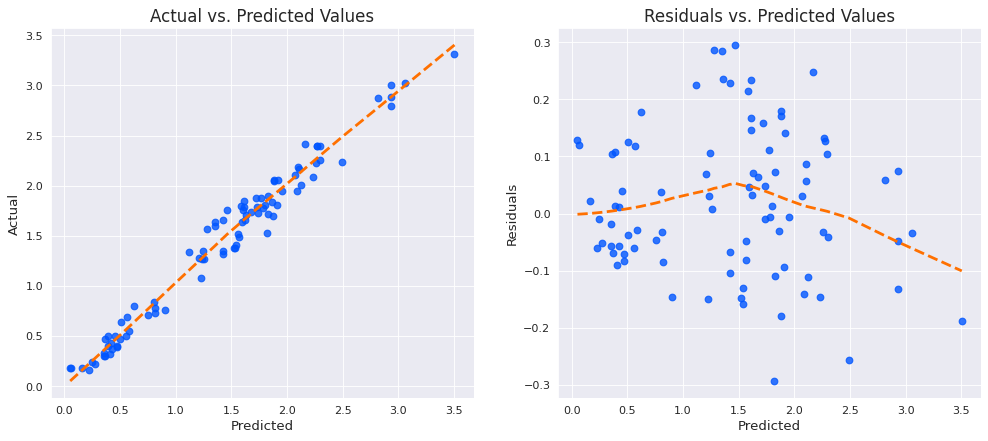

In [ ]:
linear_assumption(elastic_cv_model, X_test, y_test)

## Assumption 2 - Normality of Residuals


P-value from the test (below 0.05 generally means non-normal):   0.527837
Residuals are normally distributed. Assumption satisfied.


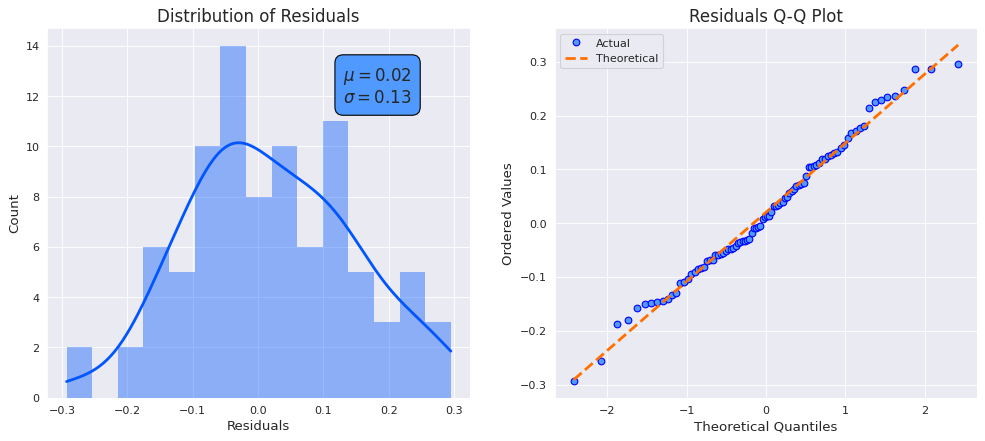

In [ ]:
normal_errors_assumption(elastic_cv_model, X_test, y_test)

## Assumption 3 - No Perfect Multicollinearity

In [ ]:
multicollinearity_assumption(X_poly[elastic_coef.index]).T

14 cases of possible multicollinearity.
9 cases of definite multicollinearity.
Assumption not satisfied.


,Age,Present_Price,Kms_Driven,Seller_Type_Individual,Age^2,Age Present_Price,Age Kms_Driven,Present_Price Owner,Present_Price Fuel_Type_Diesel,Present_Price Seller_Type_Individual,Present_Price Transmission_Manual,Kms_Driven Fuel_Type_Diesel,Kms_Driven Seller_Type_Individual,Kms_Driven Transmission_Manual,Owner Fuel_Type_Diesel,Owner Seller_Type_Individual,Owner Transmission_Manual,Fuel_Type_Diesel Transmission_Manual,Seller_Type_Individual^2,Transmission_Manual^2
vif,1480.92,262.34,908.83,inf,1055.84,242.39,829.69,2.92,27.14,7.67,54.77,33.34,24.65,111.18,1.4,2.87,4.47,9.06,inf,78.11


## Assumption 4 - No Autocorrelation of Residuals

In [ ]:
autocorrelation_assumption(elastic_cv_model, X_test, y_test)

Durbin-Watson: 1.741
Little to no autocorrelation. Assumption satisfied. 



## Assumption 5 - Homoscedasticity

The orange line should be flat:


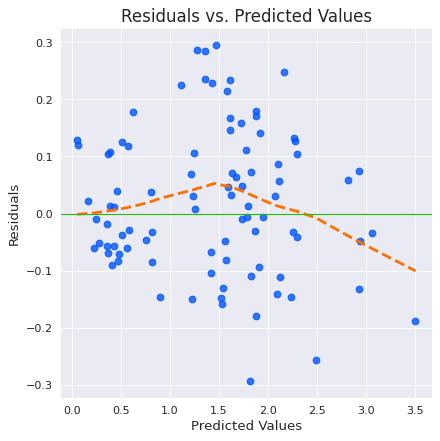

In [ ]:
homoscedasticity_assumption(elastic_cv_model, X_test, y_test)

The assumptions are fulfilled to a good extent, but the accuracy of the model is lower than the ridge model.

# Higher Order Regularized Polynomial Models

The following function produces high-order features from the 2nd order to the desired order and trains and evaluates regularized models on the set of features of each order and then it returns the r2-score and the number of features used by each regularized model in the form of two separate dataframes:

In [ ]:
def poly_check(degree, X, y):
    ridge_scores = []
    lasso_scores = []
    elasticnet_scores = []

    ridge_features = []
    lasso_features = []
    elasticnet_features = []

    for d in range(2,degree+1):
        poly_features = PolynomialFeatures(degree=d, include_bias=False)
        X_poly = poly_features.fit_transform(X)
        X_poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(X.columns))
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        # Ridge
        alphas = 10**np.linspace(10,-2,100)*0.5
        ridge_cv = RidgeCV(alphas = alphas, cv=3, scoring = 'neg_mean_squared_error')
        ridge_cv.fit(X_train, y_train)
        ridge_scores.append(ridge_cv.score(X_test,y_test))
        ridge_cols = ridge_cv.coef_[ridge_cv.coef_!=0].shape[0]
        ridge_features.append(ridge_cols)

        # Lasso
        lasso_cv = LassoCV(eps=0.01, n_alphas=100, max_iter=10000, cv=3)
        lasso_cv.fit(X_train, y_train)
        lasso_scores.append(lasso_cv.score(X_test,y_test))
        lasso_cols = lasso_cv.coef_[lasso_cv.coef_!=0].shape[0]
        lasso_features.append(lasso_cols)

        # Elastic-Net
        elastic_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, cv=3, max_iter=100000)
        elastic_cv.fit(X_train, y_train)
        elasticnet_scores.append(elastic_cv.score(X_test,y_test))
        elasticnet_cols = elastic_cv.coef_[elastic_cv.coef_!=0].shape[0]
        elasticnet_features.append(elasticnet_cols)

    scores = pd.DataFrame({'Ridge':ridge_scores, 'Lasso':lasso_scores, 'ElasticNet':elasticnet_scores}).round(4)
    scores = pd.concat([pd.DataFrame({'Degree':range(2,degree+1)}), scores], axis=1)
    feature_num = pd.DataFrame({'Ridge':ridge_features, 'Lasso':lasso_features, 'ElasticNet':elasticnet_features})
    feature_num = pd.concat([pd.DataFrame({'Degree':range(2,degree+1)}), feature_num], axis=1)
    return scores, feature_num

In [ ]:
scores, feature_num = poly_check(6, X, y)

The following code visualizes the results obtained from calling the above function:

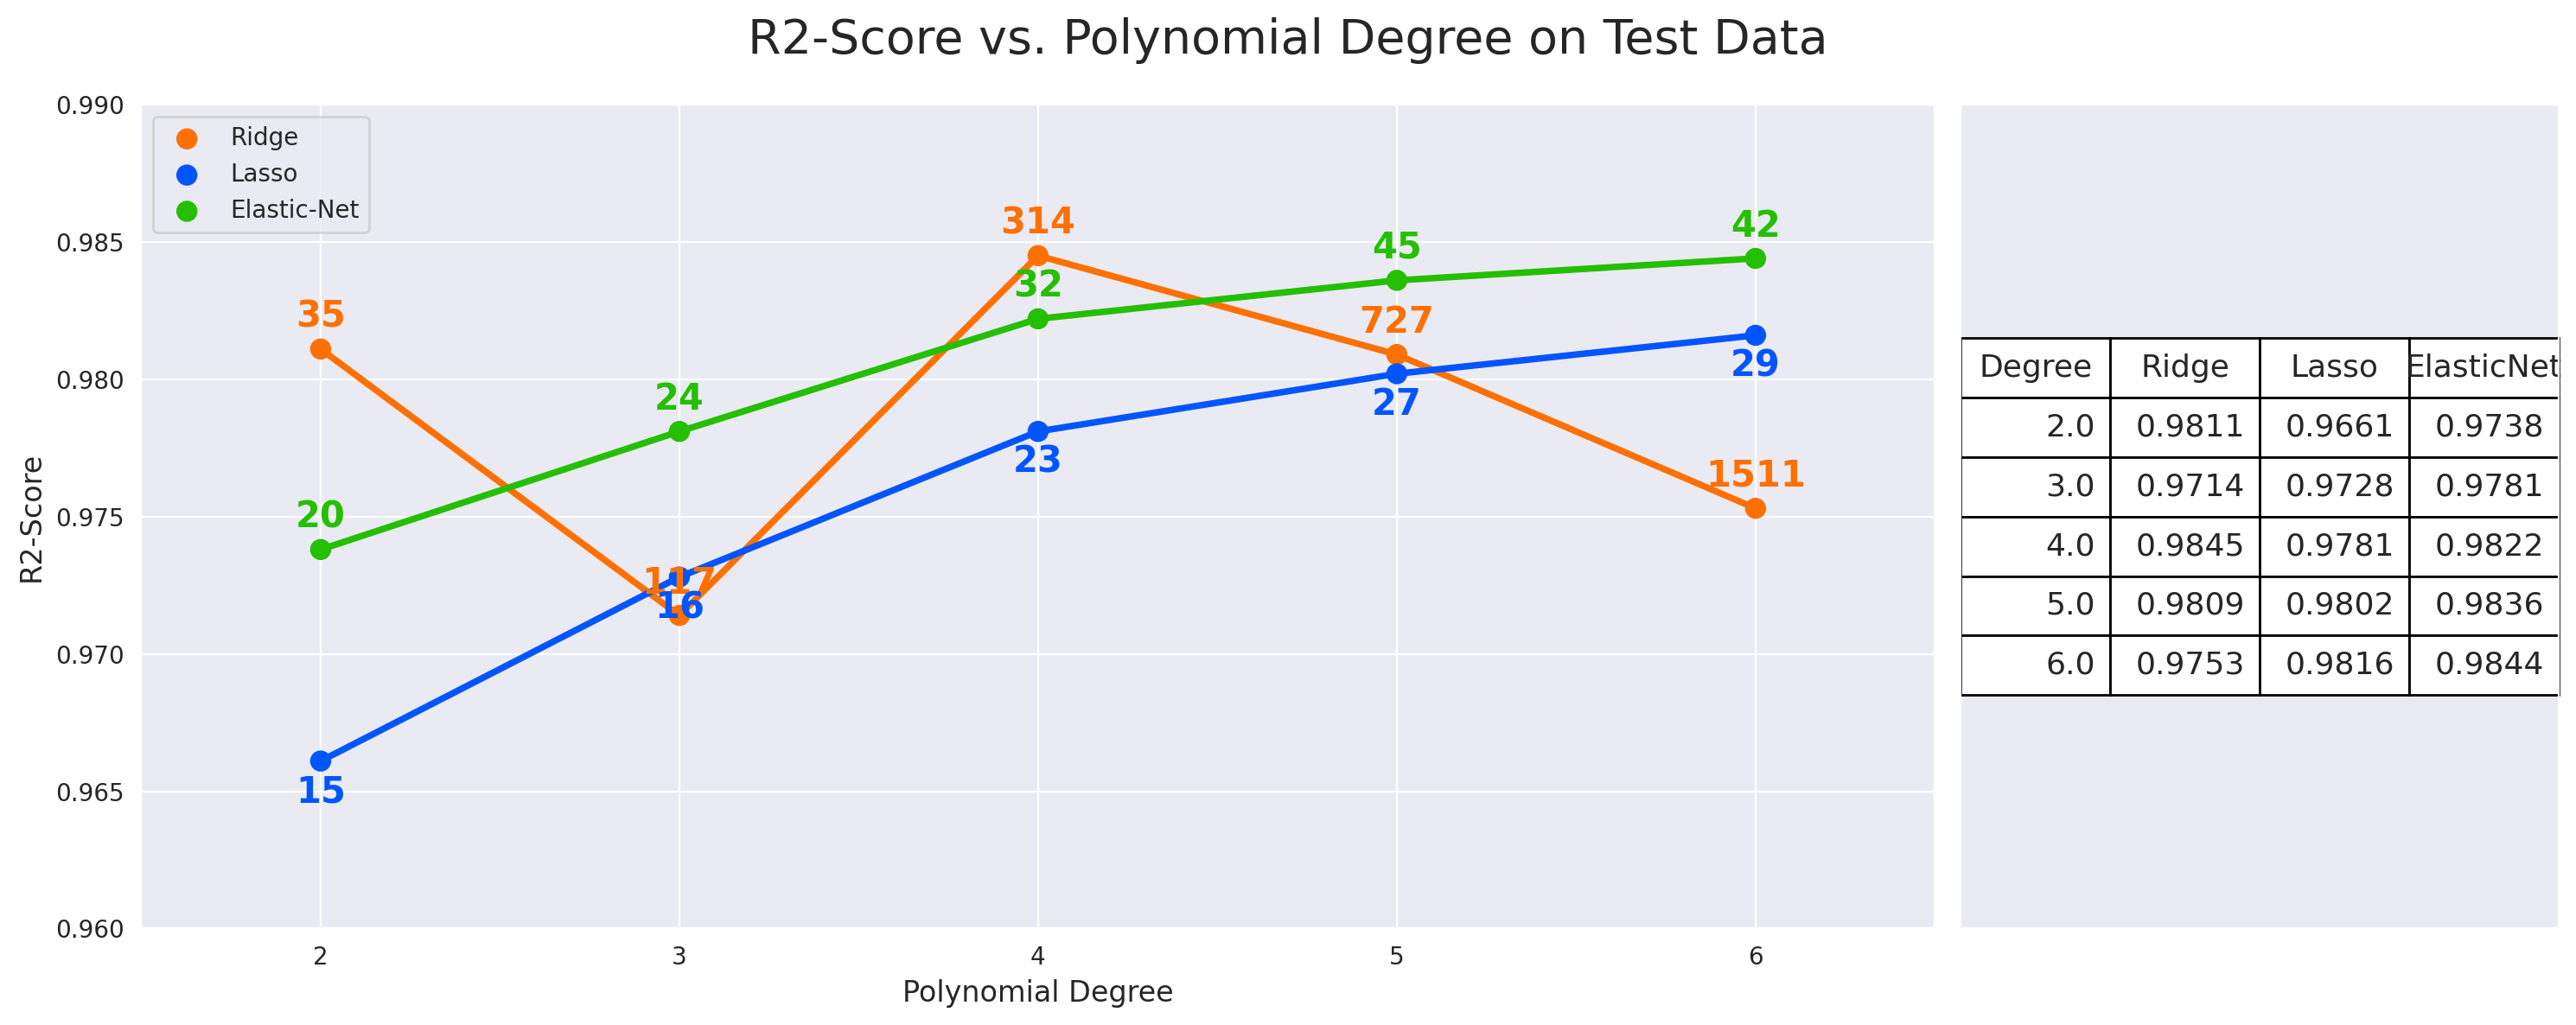

In [ ]:
# Plot1
fig, ax = plt.subplots(1, 2, figsize=(15,6), dpi=200, gridspec_kw={'width_ratios': [3, 1]})

sns.pointplot(x=scores['Degree'], y=scores['Ridge'], color='#ff7000', label='Ridge', ax=ax[0])
sns.pointplot(x=scores['Degree'], y=scores['Lasso'], color='#0055ff', label='Lasso', ax=ax[0])
sns.pointplot(x=scores['Degree'], y=scores['ElasticNet'], color='#23bf00', label='Elastic-Net', ax=ax[0])
ax[0].set_xlabel('Polynomial Degree', fontsize=12)
ax[0].set_ylabel('R2-Score', fontsize=12)
ax[0].legend(loc='upper left')
ax[0].grid(axis='x')
ax[0].set_ylim([0.96, 0.99])

# Annotate Points
for i,j,f in zip(scores['Degree']-2, scores['Ridge'], feature_num['Ridge']):
    ax[0].text(i, j+0.0008, str(f), ha='center', color='#ff7000', weight='bold', fontsize=15)

for i,j,f in zip(scores['Degree']-2, scores['Lasso'], feature_num['Lasso']):
    ax[0].text(i, j-0.0015, str(f), ha='center', color='#0055ff', weight='bold', fontsize=15)

for i,j,f in zip(scores['Degree']-2, scores['ElasticNet'], feature_num['ElasticNet']):
    ax[0].text(i, j+0.0008, str(f), ha='center', color='#23bf00', weight='bold', fontsize=15)

# Plot2
table = ax[1].table(cellText=scores.values, colLabels=scores.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(13)
ax[1].set_xticks([])
ax[1].set_yticks([])
table.scale(1, 2)

plt.suptitle('R2-Score vs. Polynomial Degree on Test Data', fontsize=20)
plt.tight_layout()
plt.show()

- The graph on the left shows the trend of r2-score changes related to three regularized models including ridge, lasso and elastic-net along with the increase in the order of the used features.
- The values annotated on the left graph are the number of features used in each model.
- The table on the right contains r2-scores for each model.
An optimal model is one that not only uses fewer features, but also has a high r2-score.
- In the situation where the simple polynomial model was overfit for the 3d-order model in the step 10, but the regularized models are not overfit for the features of orders higher than 2.

Based on the previous graph, we choose the elastic-net model based on the 4th order polynomial model as the optimal model. By increasing the order from 4 onwards, the r2-score of the model is almost constant:

Create 5th-order Polynomial Features

In [ ]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(X.columns))
X_poly.head()

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,Age Kms_Driven,...,Fuel_Type_Diesel^2 Transmission_Manual^2,Fuel_Type_Diesel Seller_Type_Individual^3,Fuel_Type_Diesel Seller_Type_Individual^2 Transmission_Manual,Fuel_Type_Diesel Seller_Type_Individual Transmission_Manual^2,Fuel_Type_Diesel Transmission_Manual^3,Seller_Type_Individual^4,Seller_Type_Individual^3 Transmission_Manual,Seller_Type_Individual^2 Transmission_Manual^2,Seller_Type_Individual Transmission_Manual^3,Transmission_Manual^4
0,1.320187,2.032688,98.846654,0.0,0.000000,0.0,1514.777352,1.742893,2.683528,130.496050,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,5.264962e+12
1,1.398824,2.587658,116.843776,0.0,0.136279,0.0,1514.777352,1.956709,3.619679,163.443905,...,42614.289158,0.0,0.0,0.0,4.736693e+08,0.0,0.0,0.0,0.0,5.264962e+12
2,0.907273,2.622591,60.223871,0.0,0.000000,0.0,1514.777352,0.823145,2.379406,54.639502,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,5.264962e+12
3,1.518024,1.749435,54.276845,0.0,0.000000,0.0,1514.777352,2.304398,2.655684,82.393575,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,5.264962e+12
4,1.320187,2.240043,116.305479,0.0,0.136279,0.0,1514.777352,1.742893,2.957275,153.544961,...,42614.289158,0.0,0.0,0.0,4.736693e+08,0.0,0.0,0.0,0.0,5.264962e+12


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
final_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, cv=4, max_iter=100000)

In [ ]:
final_model.fit(X_train, y_train)

ElasticNetCV(cv=4, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1],
             max_iter=100000)

The l1-ratio value that results in the smallest cross-validation error is:

In [ ]:
final_model.l1_ratio_

1.0

The alpha value that results in the smallest cross-validation error is:

In [ ]:
final_model.alpha_

0.0006881979800721569

Final Model Evaluation

In [ ]:
model_evaluation(final_model, X_test, y_test, 'Final Model. Test')

,Final Model. Test
MAE,0.083486
MSE,0.010573
RMSE,0.102825
R2-Score,0.982967


In [ ]:
model_evaluation(final_model, X_train, y_train, 'Final Model. Train')

,Final Model. Train
MAE,0.061915
MSE,0.006108
RMSE,0.078152
R2-Score,0.988773


The accuracy of the model on the training and test data are close to each other, so the model is not overfit.

 Final Model Coefficients

In [ ]:
final_coef = pd.DataFrame(final_model.coef_, index=X_poly.columns, columns=['Final Model Coef.'])
final_coef = final_coef[final_coef['Final Model Coef.']!=0]
final_coef.T

,Present_Price,Seller_Type_Individual,Transmission_Manual,Fuel_Type_Diesel Seller_Type_Individual,Seller_Type_Individual^2,Transmission_Manual^2,Age Fuel_Type_Diesel Seller_Type_Individual,Age Seller_Type_Individual Transmission_Manual,Present_Price Fuel_Type_Diesel Seller_Type_Individual,Kms_Driven Fuel_Type_Diesel Seller_Type_Individual,...,Present_Price Kms_Driven Owner Transmission_Manual,Present_Price Owner Seller_Type_Individual Transmission_Manual,Kms_Driven^3 Fuel_Type_Diesel,Kms_Driven^3 Transmission_Manual,Kms_Driven^2 Fuel_Type_Diesel Seller_Type_Individual,Kms_Driven^2 Fuel_Type_Diesel Transmission_Manual,Kms_Driven Fuel_Type_Diesel Seller_Type_Individual^2,Fuel_Type_Diesel^3 Seller_Type_Individual,Fuel_Type_Diesel Seller_Type_Individual^3,Seller_Type_Individual^4
Final Model Coef.,0.856798,-0.014725,-0.000162,0.000258,-0.010112,-0.000163,0.000444,-0.007739,0.00001,2.748997e-17,...,-0.000346,-0.026744,0.017305,0.011389,0.002448,-0.000069,0.000001,4.331995e-16,2.656036e-19,-0.024869


Our model contains 42 non-zero coefficients.

Final Model Multicolinearity

In [ ]:
X_poly_final = X_poly[final_coef.index]
multicollinearity_assumption(X_poly_final).T

37 cases of possible multicollinearity.
31 cases of definite multicollinearity.
Assumption not satisfied.


,Present_Price,Seller_Type_Individual,Transmission_Manual,Fuel_Type_Diesel Seller_Type_Individual,Seller_Type_Individual^2,Transmission_Manual^2,Age Fuel_Type_Diesel Seller_Type_Individual,Age Seller_Type_Individual Transmission_Manual,Present_Price Fuel_Type_Diesel Seller_Type_Individual,Kms_Driven Fuel_Type_Diesel Seller_Type_Individual,...,Present_Price Kms_Driven Owner Transmission_Manual,Present_Price Owner Seller_Type_Individual Transmission_Manual,Kms_Driven^3 Fuel_Type_Diesel,Kms_Driven^3 Transmission_Manual,Kms_Driven^2 Fuel_Type_Diesel Seller_Type_Individual,Kms_Driven^2 Fuel_Type_Diesel Transmission_Manual,Kms_Driven Fuel_Type_Diesel Seller_Type_Individual^2,Fuel_Type_Diesel^3 Seller_Type_Individual,Fuel_Type_Diesel Seller_Type_Individual^3,Seller_Type_Individual^4
vif,35.35,5.439130e+12,inf,inf,1.508888e+10,inf,inf,21.28,inf,inf,...,4.01,2.27,618.98,20.06,1.717948e+12,220.76,inf,inf,inf,9.703535e+09


Multicolinearity assumption is not satisfied.

Drop Features with High Values of VIF

To deal with multicollinearity we should iteratively drop features with high values of VIF:

In [ ]:
def vif_calculator(X):
    '''
    This function calculates VIF values of predictors
    '''
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return pd.DataFrame({'vif': vif}, index=X.columns).round(2)

In [ ]:
for i in range(X_poly_final.shape[0]):
    df_vif = vif_calculator(X_poly_final)[::-1]
    df_vif.reset_index(inplace=True)
    if df_vif['vif'].max() > 99:
        idx = df_vif['vif'].argmax()
        col = df_vif.iloc[idx]['index']
        X_poly_final.drop(col, axis=1, inplace=True)

In [ ]:
multicollinearity_assumption(X_poly_final).T

12 cases of possible multicollinearity.
0 cases of definite multicollinearity.
Assumption possibly satisfied.


,Present_Price,Transmission_Manual,Seller_Type_Individual^2,Age Seller_Type_Individual Transmission_Manual,Present_Price Fuel_Type_Diesel Seller_Type_Individual,Kms_Driven Fuel_Type_Diesel Transmission_Manual,Age^4,Age^2 Present_Price^2,Age^2 Owner Transmission_Manual,Age^2 Fuel_Type_Diesel Transmission_Manual,Age Present_Price^2 Fuel_Type_Diesel,Age Kms_Driven^2 Seller_Type_Individual,Present_Price^4,Present_Price^2 Fuel_Type_Diesel Transmission_Manual,Present_Price^2 Seller_Type_Individual Transmission_Manual,Present_Price Kms_Driven^2 Owner,Present_Price Kms_Driven Owner Transmission_Manual,Present_Price Owner Seller_Type_Individual Transmission_Manual,Kms_Driven^3 Fuel_Type_Diesel,Kms_Driven^3 Transmission_Manual
vif,33.32,21.02,10.28,20.04,2.48,75.84,12.21,33.11,4.79,41.17,16.44,9.42,29.28,19.48,2.02,3.03,3.48,2.26,13.26,9.88


We dropped definite cases of multicolinearity from the dataset.

Rebuild the Final Model based on the New Feature Space

Split the Dataset to Training & Test Sets:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly_final, y, test_size=0.3, random_state=0)

Scale Data using Standard Scaler:

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Train the Final Model:

In [ ]:
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, .998, 1],
                                 eps=0.001, n_alphas=100, cv=3, max_iter=100000)

In [ ]:
final_model.fit(X_train, y_train)

ElasticNetCV(cv=4, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1],
             max_iter=100000)

The l1-ratio value that results in the smallest cross-validation error is:

In [ ]:
final_model.l1_ratio_

1.0

alpha optimal value:

In [ ]:
final_model.alpha_

0.002778267122882585

Model Evaluation:

In [ ]:
model_scores = model_evaluation(final_model, X_test, y_test, 'Final Model. Test')
model_scores

,Final Model. Test
MAE,0.093876
MSE,0.012354
RMSE,0.111150
R2-Score,0.980098


In [ ]:
model_evaluation(final_model, X_train, y_train, 'Final Model. Test')

,Final Model. Test
MAE,0.068448
MSE,0.007699
RMSE,0.087744
R2-Score,0.985848


- The accuracy of the model on the training and test data are close to each other, so the model is not overfit.
- The R2-Score of the final model with new feature space is %98 !

The Final Model Non-Zero Coefficients:

In [ ]:
final_coef = pd.DataFrame(final_model.coef_, index=X_poly_final.columns, columns=['Final Model Coef.'])
final_coef = final_coef[final_coef['Final Model Coef.']!=0]
final_coef

,Final Model Coef.
Present_Price,0.865928
Transmission_Manual,0.011433
Seller_Type_Individual^2,-0.026340
Age^4,-0.107962
Age^2 Present_Price^2,-0.263493
Age^2 Owner Transmission_Manual,0.008020
Age Present_Price^2 Fuel_Type_Diesel,0.081971
Age Kms_Driven^2 Seller_Type_Individual,0.008963
Present_Price Kms_Driven^2 Owner,-0.019950
Present_Price Owner Seller_Type_Individual Transmission_Manual,-0.020531


Our model contains only 11 non-zero coefficients, which is fantastic!

Lets check other assumptions of the final model with the new feature space:

## Assumptions

## Assumption 1 - Linearity

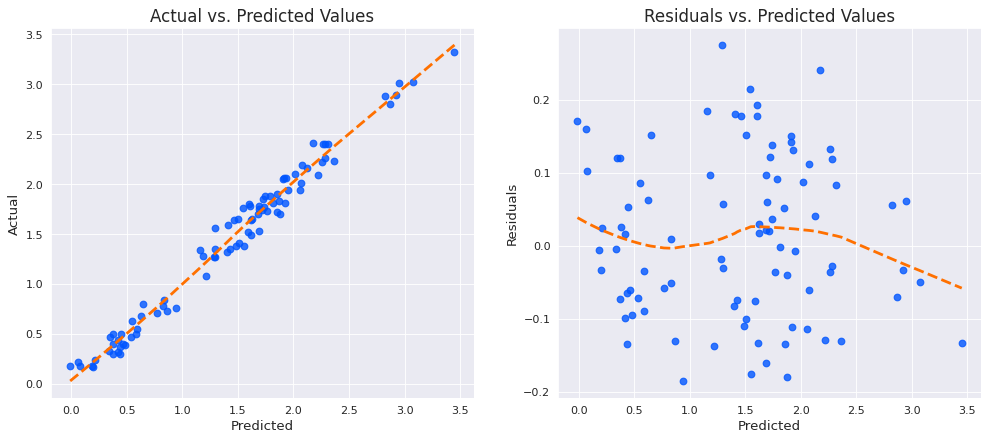

In [ ]:
linear_assumption(final_model, X_test, y_test)

## Assumption 2 - Normality of Residuals


P-value from the test (below 0.05 generally means non-normal):   0.085428
Residuals are normally distributed. Assumption satisfied.


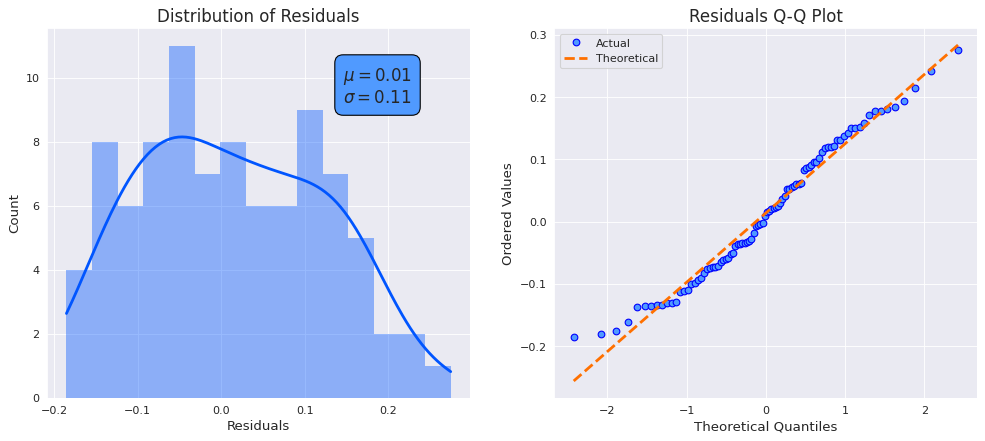

In [ ]:
normal_errors_assumption(final_model, X_test, y_test)

## Assumption 3 - No Perfect Multicollinearity

In [ ]:
X_poly_final = X_poly[final_coef.index]
multicollinearity_assumption(X_poly_final)

3 cases of possible multicollinearity.
0 cases of definite multicollinearity.
Assumption possibly satisfied.


,vif
Present_Price,18.47
Transmission_Manual,11.99
Seller_Type_Individual^2,4.95
Age^4,7.54
Age^2 Present_Price^2,15.72
Age^2 Owner Transmission_Manual,2.31
Age Present_Price^2 Fuel_Type_Diesel,2.10
Age Kms_Driven^2 Seller_Type_Individual,4.07
Present_Price Kms_Driven^2 Owner,1.59
Present_Price Owner Seller_Type_Individual Transmission_Manual,1.97


## Assumption 4 - No Autocorrelation of Residuals

In [ ]:
autocorrelation_assumption(final_model, X_test, y_test)

Durbin-Watson: 1.699
Little to no autocorrelation. Assumption satisfied. 



## Assumption 5 - Homoscedasticity

The orange line should be flat:


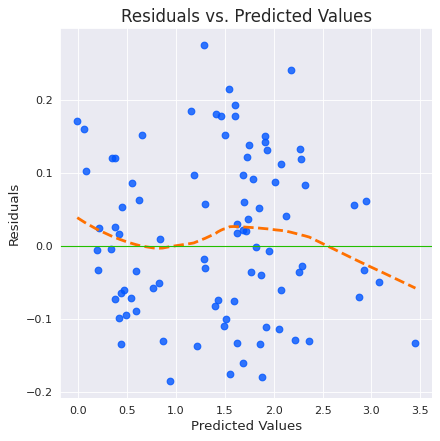

In [ ]:
homoscedasticity_assumption(final_model, X_test, y_test)

All regression assumptions are met on the test data.

# Results Visualization

We again compare the actual target values ​​and those predicted by the final model for the test data:

In [ ]:
from scipy.special import inv_boxcox

In [ ]:
y_test_pred = final_model.predict(X_test)
y_test_pred = inv_boxcox(y_test_pred, fitted_lambda['Selling_Price']) - 1

In [ ]:
df_comp = pd.DataFrame({'Actual':y_test_actual, 'Predicted':y_test_pred})

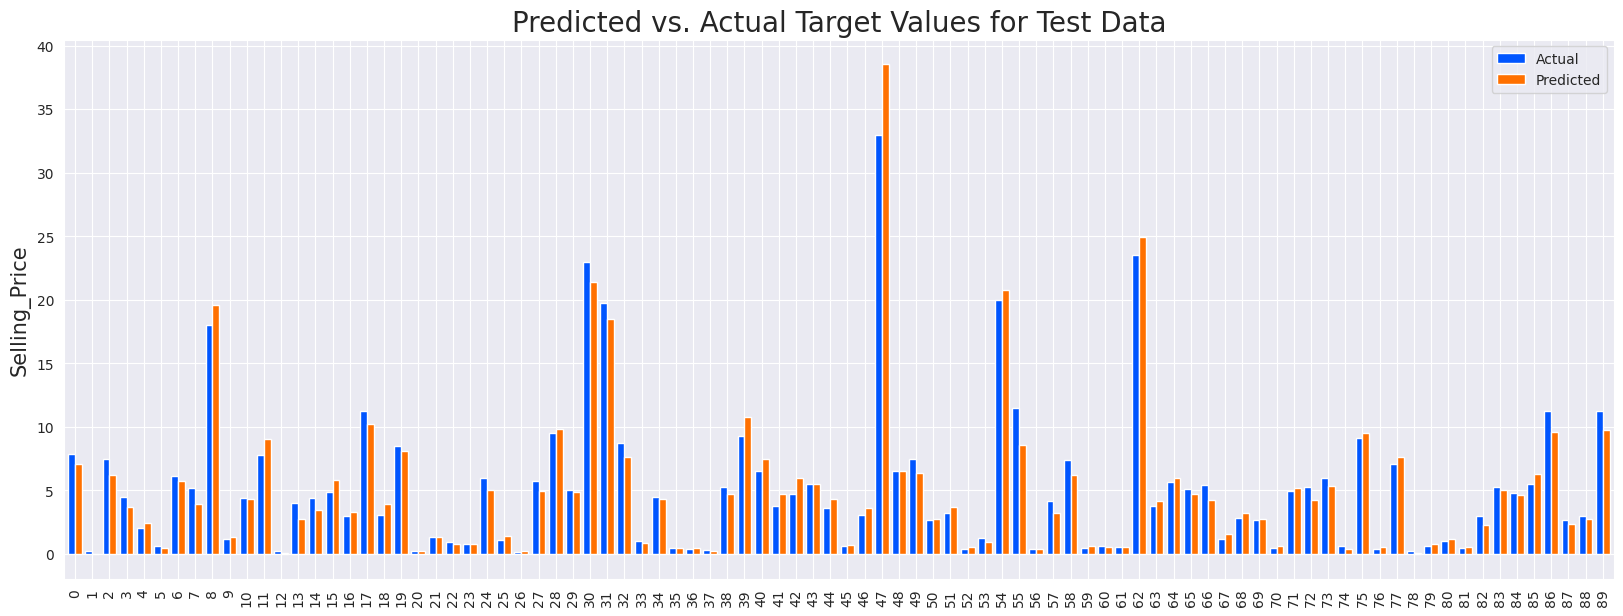

In [ ]:
compare_plot(df_comp)

As we can see in the bar chart above, not only the difference between the predicted values and the actual values has decreased compared to the original linear model, but on the other hand, almost no negative value is predicted for Selling_Price, which is wonderful!

# Conclusion

Out of all regression models, the "Elastic-Net" model is performing the best on this dataset.

The model only contains 11 independent variables whose coefficients in the model are:

In [ ]:
final_coef.reset_index().replace(' ',' . ', regex=True).set_index('index')

,Final Model Coef.
index,
Present_Price,0.865928
Transmission_Manual,0.011433
Seller_Type_Individual^2,-0.026340
Age^4,-0.107962
Age^2 . Present_Price^2,-0.263493
Age^2 . Owner . Transmission_Manual,0.008020
Age . Present_Price^2 . Fuel_Type_Diesel,0.081971
Age . Kms_Driven^2 . Seller_Type_Individual,0.008963
Present_Price . Kms_Driven^2 . Owner,-0.019950


The evaluation of the model on the unseen data is as follows

In [ ]:
model_scores

,Final Model. Test
MAE,0.093876
MSE,0.012354
RMSE,0.111150
R2-Score,0.980098


🏆The model satisfies all regression assumptions including:
- Assumption 1 - Linearity
- Assumption 2 - Normality of Residuals
- Assumption 3 - No Perfect Multicollinearity
- Assumption 4 - No Autocorrelation of Residuals
- Assumption 5 - Homoscedasticity